In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("netflix.csv")

In [4]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import missingno as msno

<Axes: >

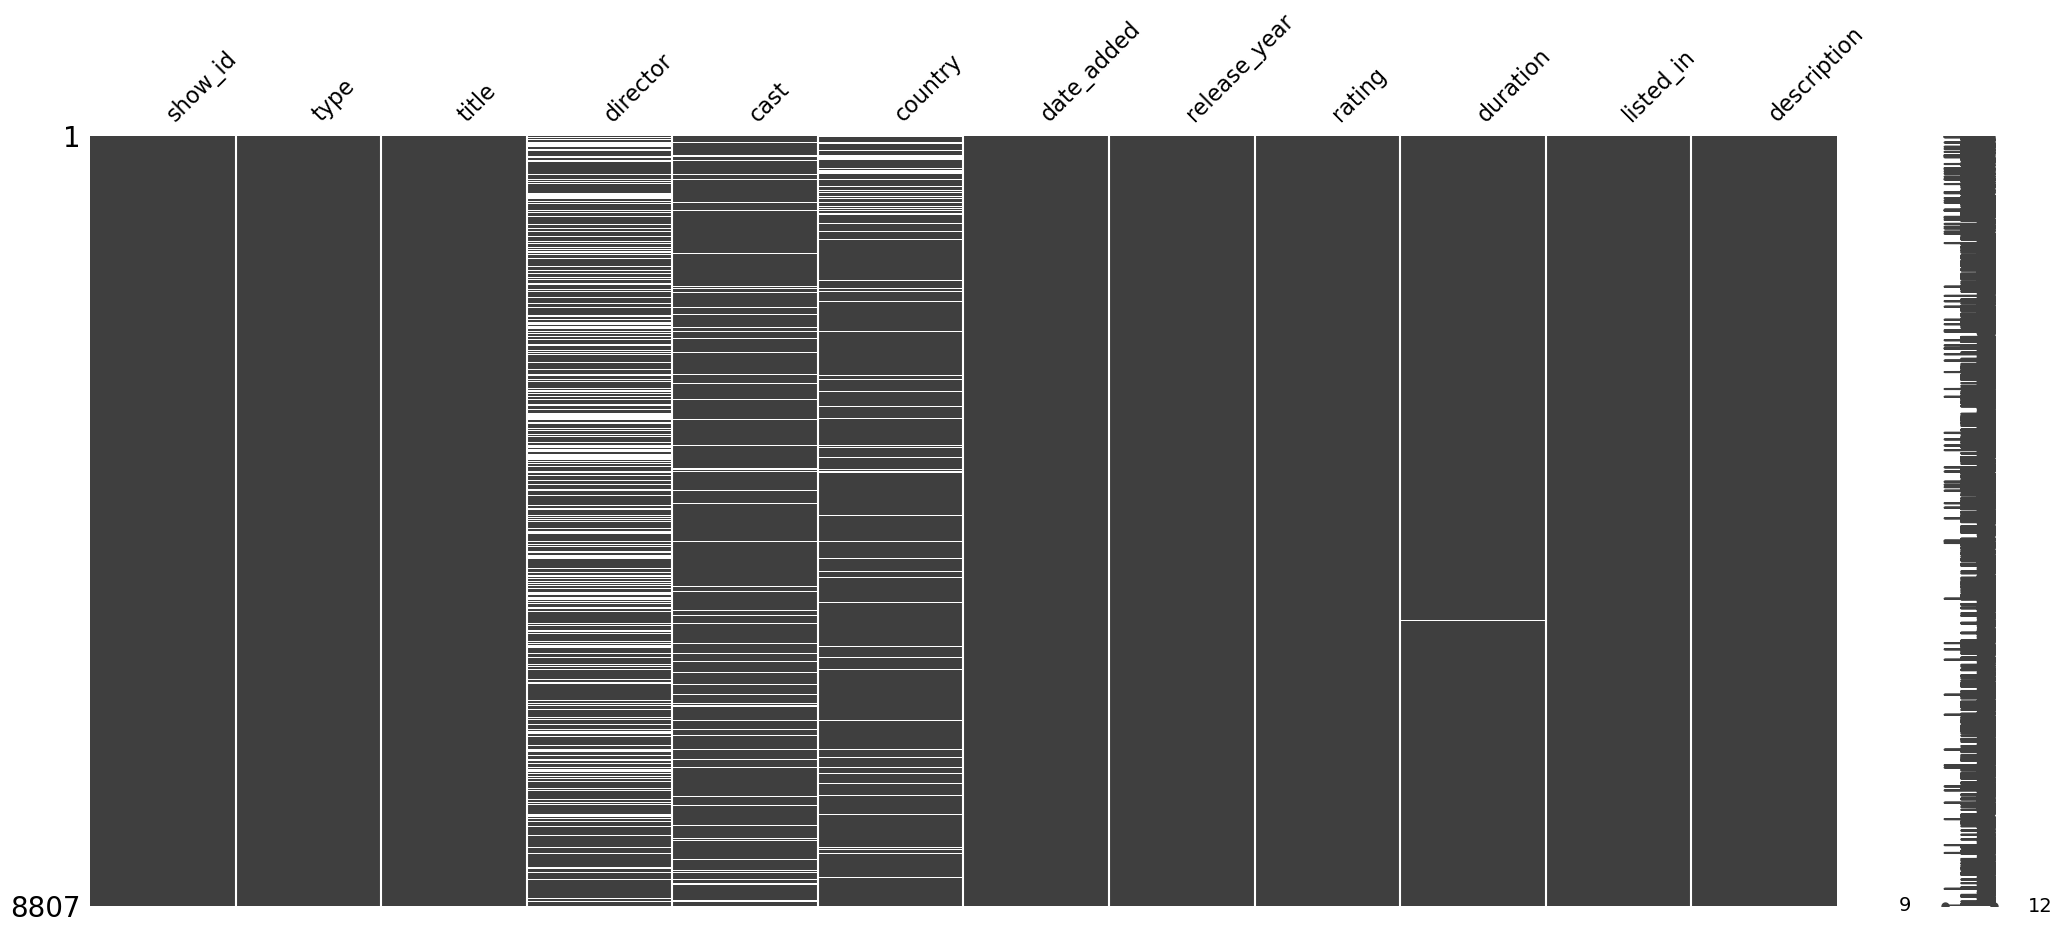

In [7]:
msno.matrix(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.shape

(8807, 12)

In [11]:
df["show_id"].nunique()

8807

In [12]:
df["title"].nunique()

8807

In [13]:
df_cast=df[["show_id","cast"]]

In [14]:
df_cast.head()

show_id                                               cast
0      s1                                                NaN
1      s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2      s3  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3      s4                                                NaN
4      s5  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...

In [15]:
explode_cast=df_cast["cast"].str.split(",",expand=True)

In [16]:
df_cast.head()

show_id                                               cast
0      s1                                                NaN
1      s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2      s3  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3      s4                                                NaN
4      s5  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...

In [17]:
new_cast=pd.merge(explode_cast,df_cast,left_index=True,right_index=True,how="left")

In [18]:
new_cast.drop("cast",axis=1,inplace=True)

In [19]:
new_cast.shape

(8807, 51)

In [20]:
melted_cast=pd.melt(new_cast,
       id_vars=["show_id"],
       var_name="cast_count",
       value_name="cast")

In [21]:
melted_cast.drop_duplicates(inplace=True)

In [22]:
melted_cast

show_id cast_count           cast
0           s1          0            NaN
1           s2          0     Ama Qamata
2           s3          0  Sami Bouajila
3           s4          0            NaN
4           s5          0     Mayur More
...        ...        ...            ...
440345   s8803         49           None
440346   s8804         49            NaN
440347   s8805         49           None
440348   s8806         49           None
440349   s8807         49           None

[440350 rows x 3 columns]

In [23]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [24]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [25]:
df_direct=df[["show_id","director"]]

In [26]:
df_dir_expand=df_direct["director"].str.split(",",expand=True)

In [27]:
df_dir_expand_new=pd.merge(df_direct,df_dir_expand,left_index=True,right_index=True,how="left")

In [28]:
df_dir_expand_new.drop("director",axis=1,inplace=True)

In [29]:
df_dir_expand_new

show_id                0     1     2     3     4     5     6     7     8  \
0         s1  Kirsten Johnson  None  None  None  None  None  None  None  None   
1         s2              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2         s3  Julien Leclercq  None  None  None  None  None  None  None  None   
3         s4              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         s5              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...      ...              ...   ...   ...   ...   ...   ...   ...   ...   ...   
8802   s8803    David Fincher  None  None  None  None  None  None  None  None   
8803   s8804              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8804   s8805  Ruben Fleischer  None  None  None  None  None  None  None  None   
8805   s8806     Peter Hewitt  None  None  None  None  None  None  None  None   
8806   s8807      Mozez Singh  None  None  None  None  None  None  None  None   

         9    10    11    12  
0     None  None  None  None  
1      NaN   NaN   NaN   NaN  
2     None  None  None  None  
3      NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...  
8802  None  None  None  None  
8803   NaN   NaN   NaN   NaN  
8804  None  None  None  None  
8805  None  None  None  None  
8806  None  None  None  None  

[8807 rows x 14 columns]

In [30]:
melted_direct=pd.melt(df_dir_expand_new,
                     id_vars="show_id",
                     var_name="director_count",
                     value_name="director")

In [31]:
melted_direct

show_id director_count         director
0           s1              0  Kirsten Johnson
1           s2              0              NaN
2           s3              0  Julien Leclercq
3           s4              0              NaN
4           s5              0              NaN
...        ...            ...              ...
114486   s8803             12             None
114487   s8804             12              NaN
114488   s8805             12             None
114489   s8806             12             None
114490   s8807             12             None

[114491 rows x 3 columns]

In [32]:
melted_direct.drop("director_count",axis=1,inplace=True)

In [33]:
melted_direct.drop_duplicates(inplace=True)

In [34]:
melted_direct

show_id           director
0           s1    Kirsten Johnson
1           s2                NaN
2           s3    Julien Leclercq
3           s4                NaN
4           s5                NaN
...        ...                ...
103787   s6911   Hiroshi Yamazaki
104392   s7516         James Gunn
111571   s5888          Mark Henn
112594   s6911               None
113199   s7516               None

[15784 rows x 2 columns]

In [35]:
df_country=df[["show_id","country"]]

In [36]:
df_country_exp=df["country"].str.split(",",expand=True)

In [37]:
df_country_exp

0     1     2     3     4     5     6     7     8     9   \
0     United States  None  None  None  None  None  None  None  None  None   
1      South Africa  None  None  None  None  None  None  None  None  None   
2               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4             India  None  None  None  None  None  None  None  None  None   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8802  United States  None  None  None  None  None  None  None  None  None   
8803            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8804  United States  None  None  None  None  None  None  None  None  None   
8805  United States  None  None  None  None  None  None  None  None  None   
8806          India  None  None  None  None  None  None  None  None  None   

        10    11  
0     None  None  
1     None  None  
2      NaN   NaN  
3      NaN   NaN  
4     None  None  
...    ...   ...  
8802  None  None  
8803   NaN   NaN  
8804  None  None  
8805  None  None  
8806  None  None  

[8807 rows x 12 columns]

In [38]:
df_count_new=pd.merge(df_country,df_country_exp,left_index=True,right_index=True,how="left")

In [39]:
df_count_new.drop("country",axis=1,inplace=True)

In [40]:
df_count_new

show_id              0     1     2     3     4     5     6     7     8  \
0         s1  United States  None  None  None  None  None  None  None  None   
1         s2   South Africa  None  None  None  None  None  None  None  None   
2         s3            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         s4            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         s5          India  None  None  None  None  None  None  None  None   
...      ...            ...   ...   ...   ...   ...   ...   ...   ...   ...   
8802   s8803  United States  None  None  None  None  None  None  None  None   
8803   s8804            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8804   s8805  United States  None  None  None  None  None  None  None  None   
8805   s8806  United States  None  None  None  None  None  None  None  None   
8806   s8807          India  None  None  None  None  None  None  None  None   

         9    10    11  
0     None  None  None  
1     None  None  None  
2      NaN   NaN   NaN  
3      NaN   NaN   NaN  
4     None  None  None  
...    ...   ...   ...  
8802  None  None  None  
8803   NaN   NaN   NaN  
8804  None  None  None  
8805  None  None  None  
8806  None  None  None  

[8807 rows x 13 columns]

In [41]:
melt_country=pd.melt(df_count_new,id_vars="show_id",
                                  var_name="country_count",
                                   value_name="country")

In [42]:
melt_country.drop("country_count",axis=1,inplace=True)

In [43]:
melt_country.drop_duplicates(inplace=True)

In [44]:
melt_country

show_id         country
0           s1   United States
1           s2    South Africa
2           s3             NaN
3           s4             NaN
4           s5           India
...        ...             ...
85496    s6234          Sweden
87666    s8404     Netherlands
94303    s6234   United States
96473    s8404            None
103110   s6234         Uruguay

[18825 rows x 2 columns]

In [45]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [46]:
df.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [47]:
df.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [48]:
df_category=df[["show_id","listed_in"]]

In [49]:
df_category.head()

show_id                                          listed_in
0      s1                                      Documentaries
1      s2    International TV Shows, TV Dramas, TV Mysteries
2      s3  Crime TV Shows, International TV Shows, TV Act...
3      s4                             Docuseries, Reality TV
4      s5  International TV Shows, Romantic TV Shows, TV ...

In [51]:
df_cat=df_category["listed_in"].str.split(",",expand=True)

In [52]:
df_cat.head()

0                        1                       2
0           Documentaries                     None                    None
1  International TV Shows                TV Dramas            TV Mysteries
2          Crime TV Shows   International TV Shows   TV Action & Adventure
3              Docuseries               Reality TV                    None
4  International TV Shows        Romantic TV Shows             TV Comedies

In [53]:
genre_expl=pd.merge(df_category,df_cat,left_index=True,right_index=True,how="left")

In [54]:
genre_expl.head()

show_id                                          listed_in  \
0      s1                                      Documentaries   
1      s2    International TV Shows, TV Dramas, TV Mysteries   
2      s3  Crime TV Shows, International TV Shows, TV Act...   
3      s4                             Docuseries, Reality TV   
4      s5  International TV Shows, Romantic TV Shows, TV ...   

                        0                        1                       2  
0           Documentaries                     None                    None  
1  International TV Shows                TV Dramas            TV Mysteries  
2          Crime TV Shows   International TV Shows   TV Action & Adventure  
3              Docuseries               Reality TV                    None  
4  International TV Shows        Romantic TV Shows             TV Comedies

In [55]:
genre_expl.drop("listed_in",axis=1,inplace=True)

In [56]:
melted_genre=pd.melt(genre_expl,
                    id_vars="show_id",
                     var_name="genre_count",
                     value_name="genre")

In [57]:
melted_genre.drop("genre_count",axis=1,inplace=True)

In [58]:
melted_genre.drop_duplicates(inplace=True)

In [59]:
melted_genre

show_id                   genre
0          s1           Documentaries
1          s2  International TV Shows
2          s3          Crime TV Shows
3          s4              Docuseries
4          s5  International TV Shows
...       ...                     ...
26416   s8803               Thrillers
26417   s8804             TV Comedies
26418   s8805                    None
26419   s8806                    None
26420   s8807        Music & Musicals

[24401 rows x 2 columns]

In [60]:
melted_cast.drop("cast_count",axis=1,inplace=True)

In [61]:
melted_cast

show_id           cast
0           s1            NaN
1           s2     Ama Qamata
2           s3  Sami Bouajila
3           s4            NaN
4           s5     Mayur More
...        ...            ...
440345   s8803           None
440346   s8804            NaN
440347   s8805           None
440348   s8806           None
440349   s8807           None

[440350 rows x 2 columns]

In [62]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [63]:
df_objects=df[["show_id","type","title","date_added","release_year","rating","duration"]]

In [64]:
df_new1=pd.merge(melted_cast,df_objects,on="show_id",how="left")

In [65]:
df_new1

show_id           cast     type                  title  \
0           s1            NaN    Movie   Dick Johnson Is Dead   
1           s2     Ama Qamata  TV Show          Blood & Water   
2           s3  Sami Bouajila  TV Show              Ganglands   
3           s4            NaN  TV Show  Jailbirds New Orleans   
4           s5     Mayur More  TV Show           Kota Factory   
...        ...            ...      ...                    ...   
440345   s8803           None    Movie                 Zodiac   
440346   s8804            NaN  TV Show            Zombie Dumb   
440347   s8805           None    Movie             Zombieland   
440348   s8806           None    Movie                   Zoom   
440349   s8807           None    Movie                 Zubaan   

                date_added  release_year rating   duration  
0       September 25, 2021          2020  PG-13     90 min  
1       September 24, 2021          2021  TV-MA  2 Seasons  
2       September 24, 2021          2021  TV-MA   1 Season  
3       September 24, 2021          2021  TV-MA   1 Season  
4       September 24, 2021          2021  TV-MA  2 Seasons  
...                    ...           ...    ...        ...  
440345   November 20, 2019          2007      R    158 min  
440346        July 1, 2019          2018  TV-Y7  2 Seasons  
440347    November 1, 2019          2009      R     88 min  
440348    January 11, 2020          2006     PG     88 min  
440349       March 2, 2019          2015  TV-14    111 min  

[440350 rows x 8 columns]

In [66]:
df_new2=pd.merge(df_new1,melted_genre,on="show_id",how="inner")

In [67]:
df_new2

show_id  cast   type                 title          date_added  \
0            s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
1            s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
2            s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
3            s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
4            s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
...         ...   ...    ...                   ...                 ...   
1220045   s8807  None  Movie                Zubaan       March 2, 2019   
1220046   s8807  None  Movie                Zubaan       March 2, 2019   
1220047   s8807  None  Movie                Zubaan       March 2, 2019   
1220048   s8807  None  Movie                Zubaan       March 2, 2019   
1220049   s8807  None  Movie                Zubaan       March 2, 2019   

         release_year rating duration                  genre  
0                2020  PG-13   90 min          Documentaries  
1                2020  PG-13   90 min                   None  
2                2020  PG-13   90 min          Documentaries  
3                2020  PG-13   90 min                   None  
4                2020  PG-13   90 min          Documentaries  
...               ...    ...      ...                    ...  
1220045          2015  TV-14  111 min   International Movies  
1220046          2015  TV-14  111 min       Music & Musicals  
1220047          2015  TV-14  111 min                 Dramas  
1220048          2015  TV-14  111 min   International Movies  
1220049          2015  TV-14  111 min       Music & Musicals  

[1220050 rows x 9 columns]

In [68]:
df_new2.drop_duplicates(inplace=True)

In [69]:
df_new2

show_id                    cast     type                 title  \
0            s1                     NaN    Movie  Dick Johnson Is Dead   
1            s1                     NaN    Movie  Dick Johnson Is Dead   
100          s2              Ama Qamata  TV Show         Blood & Water   
101          s2              Ama Qamata  TV Show         Blood & Water   
102          s2              Ama Qamata  TV Show         Blood & Water   
...         ...                     ...      ...                   ...   
1219922   s8807   Chittaranjan Tripathy    Movie                Zubaan   
1219923   s8807   Chittaranjan Tripathy    Movie                Zubaan   
1219924   s8807                    None    Movie                Zubaan   
1219925   s8807                    None    Movie                Zubaan   
1219926   s8807                    None    Movie                Zubaan   

                 date_added  release_year rating   duration  \
0        September 25, 2021          2020  PG-13     90 min   
1        September 25, 2021          2020  PG-13     90 min   
100      September 24, 2021          2021  TV-MA  2 Seasons   
101      September 24, 2021          2021  TV-MA  2 Seasons   
102      September 24, 2021          2021  TV-MA  2 Seasons   
...                     ...           ...    ...        ...   
1219922       March 2, 2019          2015  TV-14    111 min   
1219923       March 2, 2019          2015  TV-14    111 min   
1219924       March 2, 2019          2015  TV-14    111 min   
1219925       March 2, 2019          2015  TV-14    111 min   
1219926       March 2, 2019          2015  TV-14    111 min   

                          genre  
0                 Documentaries  
1                          None  
100      International TV Shows  
101                   TV Dramas  
102                TV Mysteries  
...                         ...  
1219922    International Movies  
1219923        Music & Musicals  
1219924                  Dramas  
1219925    International Movies  
1219926        Music & Musicals  

[205982 rows x 9 columns]

In [70]:
df_new3=pd.merge(df_new2,melt_country,on="show_id",how="inner")

In [71]:
df_new3

show_id        cast     type                 title          date_added  \
0           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
1           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
2           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
3           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
4           s2  Ama Qamata  TV Show         Blood & Water  September 24, 2021   
...        ...         ...      ...                   ...                 ...   
448292   s8807        None    Movie                Zubaan       March 2, 2019   
448293   s8807        None    Movie                Zubaan       March 2, 2019   
448294   s8807        None    Movie                Zubaan       March 2, 2019   
448295   s8807        None    Movie                Zubaan       March 2, 2019   
448296   s8807        None    Movie                Zubaan       March 2, 2019   

        release_year rating   duration                   genre        country  
0               2020  PG-13     90 min           Documentaries  United States  
1               2020  PG-13     90 min           Documentaries           None  
2               2020  PG-13     90 min                    None  United States  
3               2020  PG-13     90 min                    None           None  
4               2021  TV-MA  2 Seasons  International TV Shows   South Africa  
...              ...    ...        ...                     ...            ...  
448292          2015  TV-14    111 min                  Dramas           None  
448293          2015  TV-14    111 min    International Movies          India  
448294          2015  TV-14    111 min    International Movies           None  
448295          2015  TV-14    111 min        Music & Musicals          India  
448296          2015  TV-14    111 min        Music & Musicals           None  

[448297 rows x 10 columns]

In [72]:
df_new3.drop_duplicates(inplace=True)

In [73]:
df_new3

show_id        cast     type                 title          date_added  \
0           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
1           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
2           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
3           s1         NaN    Movie  Dick Johnson Is Dead  September 25, 2021   
4           s2  Ama Qamata  TV Show         Blood & Water  September 24, 2021   
...        ...         ...      ...                   ...                 ...   
448292   s8807        None    Movie                Zubaan       March 2, 2019   
448293   s8807        None    Movie                Zubaan       March 2, 2019   
448294   s8807        None    Movie                Zubaan       March 2, 2019   
448295   s8807        None    Movie                Zubaan       March 2, 2019   
448296   s8807        None    Movie                Zubaan       March 2, 2019   

        release_year rating   duration                   genre        country  
0               2020  PG-13     90 min           Documentaries  United States  
1               2020  PG-13     90 min           Documentaries           None  
2               2020  PG-13     90 min                    None  United States  
3               2020  PG-13     90 min                    None           None  
4               2021  TV-MA  2 Seasons  International TV Shows   South Africa  
...              ...    ...        ...                     ...            ...  
448292          2015  TV-14    111 min                  Dramas           None  
448293          2015  TV-14    111 min    International Movies          India  
448294          2015  TV-14    111 min    International Movies           None  
448295          2015  TV-14    111 min        Music & Musicals          India  
448296          2015  TV-14    111 min        Music & Musicals           None  

[448297 rows x 10 columns]

In [74]:
df_new4=pd.merge(df_new3,melted_direct,on="show_id",how="inner")

In [75]:
df_new4.drop_duplicates(inplace=True)

In [76]:
df_new4

show_id  cast   type                 title          date_added  \
0           s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
1           s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
2           s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
3           s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
4           s1   NaN  Movie  Dick Johnson Is Dead  September 25, 2021   
...        ...   ...    ...                   ...                 ...   
814917   s8807  None  Movie                Zubaan       March 2, 2019   
814918   s8807  None  Movie                Zubaan       March 2, 2019   
814919   s8807  None  Movie                Zubaan       March 2, 2019   
814920   s8807  None  Movie                Zubaan       March 2, 2019   
814921   s8807  None  Movie                Zubaan       March 2, 2019   

        release_year rating duration                  genre        country  \
0               2020  PG-13   90 min          Documentaries  United States   
1               2020  PG-13   90 min          Documentaries  United States   
2               2020  PG-13   90 min          Documentaries           None   
3               2020  PG-13   90 min          Documentaries           None   
4               2020  PG-13   90 min                   None  United States   
...              ...    ...      ...                    ...            ...   
814917          2015  TV-14  111 min   International Movies           None   
814918          2015  TV-14  111 min       Music & Musicals          India   
814919          2015  TV-14  111 min       Music & Musicals          India   
814920          2015  TV-14  111 min       Music & Musicals           None   
814921          2015  TV-14  111 min       Music & Musicals           None   

               director  
0       Kirsten Johnson  
1                  None  
2       Kirsten Johnson  
3                  None  
4       Kirsten Johnson  
...                 ...  
814917             None  
814918      Mozez Singh  
814919             None  
814920      Mozez Singh  
814921             None  

[814922 rows x 11 columns]

In [77]:
df_new4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814922 entries, 0 to 814921
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       814922 non-null  object
 1   cast          719877 non-null  object
 2   type          814922 non-null  object
 3   title         814922 non-null  object
 4   date_added    814472 non-null  object
 5   release_year  814922 non-null  int64 
 6   rating        814666 non-null  object
 7   duration      814874 non-null  object
 8   genre         655120 non-null  object
 9   country       445459 non-null  object
 10  director      366689 non-null  object
dtypes: int64(1), object(10)
memory usage: 74.6+ MB


In [78]:
df_new4["date_added"]=pd.to_datetime(df_new4["date_added"])

In [79]:
df_new4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814922 entries, 0 to 814921
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       814922 non-null  object        
 1   cast          719877 non-null  object        
 2   type          814922 non-null  object        
 3   title         814922 non-null  object        
 4   date_added    814472 non-null  datetime64[ns]
 5   release_year  814922 non-null  int64         
 6   rating        814666 non-null  object        
 7   duration      814874 non-null  object        
 8   genre         655120 non-null  object        
 9   country       445459 non-null  object        
 10  director      366689 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 74.6+ MB


In [80]:
df_new5=df_new4.copy(deep=True)

In [81]:
df_new5["genre"].isnull()

0         False
1         False
2         False
3         False
4          True
          ...  
814917    False
814918    False
814919    False
814920    False
814921    False
Name: genre, Length: 814922, dtype: bool

In [82]:
def fillna_mode(group):
    mode = group.mode().iloc[0]  # Calculate the mode of the group
    return group.fillna(mode)

In [83]:
df_new5["genre_mode"]=df_new5.groupby(["show_id"])["genre"].apply(fillna_mode)

C:\Users\D E L L\AppData\Local\Temp\ipykernel_3668\4284929089.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_new5["genre_mode"]=df_new5.groupby(["show_id"])["genre"].apply(fillna_mode)


In [84]:
df_new5["country"].isnull()

0         False
1         False
2          True
3          True
4         False
          ...  
814917     True
814918    False
814919    False
814920     True
814921     True
Name: country, Length: 814922, dtype: bool

In [85]:
df_new5

show_id  cast   type                 title date_added  release_year  \
0           s1   NaN  Movie  Dick Johnson Is Dead 2021-09-25          2020   
1           s1   NaN  Movie  Dick Johnson Is Dead 2021-09-25          2020   
2           s1   NaN  Movie  Dick Johnson Is Dead 2021-09-25          2020   
3           s1   NaN  Movie  Dick Johnson Is Dead 2021-09-25          2020   
4           s1   NaN  Movie  Dick Johnson Is Dead 2021-09-25          2020   
...        ...   ...    ...                   ...        ...           ...   
814917   s8807  None  Movie                Zubaan 2019-03-02          2015   
814918   s8807  None  Movie                Zubaan 2019-03-02          2015   
814919   s8807  None  Movie                Zubaan 2019-03-02          2015   
814920   s8807  None  Movie                Zubaan 2019-03-02          2015   
814921   s8807  None  Movie                Zubaan 2019-03-02          2015   

       rating duration                  genre        country         director  \
0       PG-13   90 min          Documentaries  United States  Kirsten Johnson   
1       PG-13   90 min          Documentaries  United States             None   
2       PG-13   90 min          Documentaries           None  Kirsten Johnson   
3       PG-13   90 min          Documentaries           None             None   
4       PG-13   90 min                   None  United States  Kirsten Johnson   
...       ...      ...                    ...            ...              ...   
814917  TV-14  111 min   International Movies           None             None   
814918  TV-14  111 min       Music & Musicals          India      Mozez Singh   
814919  TV-14  111 min       Music & Musicals          India             None   
814920  TV-14  111 min       Music & Musicals           None      Mozez Singh   
814921  TV-14  111 min       Music & Musicals           None             None   

                   genre_mode  
0               Documentaries  
1               Documentaries  
2               Documentaries  
3               Documentaries  
4               Documentaries  
...                       ...  
814917   International Movies  
814918       Music & Musicals  
814919       Music & Musicals  
814920       Music & Musicals  
814921       Music & Musicals  

[814922 rows x 12 columns]

In [86]:
df_new5.drop("genre",axis=1,inplace=True)

In [87]:
df_new5.drop_duplicates(inplace=True)

In [88]:
df_new5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655120 entries, 0 to 814921
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       655120 non-null  object        
 1   cast          580381 non-null  object        
 2   type          655120 non-null  object        
 3   title         655120 non-null  object        
 4   date_added    654766 non-null  datetime64[ns]
 5   release_year  655120 non-null  int64         
 6   rating        654961 non-null  object        
 7   duration      655096 non-null  object        
 8   country       357244 non-null  object        
 9   director      292097 non-null  object        
 10  genre_mode    655120 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 60.0+ MB


In [90]:
df_new5

show_id        cast     type                 title date_added  \
0           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
1           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
2           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
3           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
8           s2  Ama Qamata  TV Show         Blood & Water 2021-09-24   
...        ...         ...      ...                   ...        ...   
814917   s8807        None    Movie                Zubaan 2019-03-02   
814918   s8807        None    Movie                Zubaan 2019-03-02   
814919   s8807        None    Movie                Zubaan 2019-03-02   
814920   s8807        None    Movie                Zubaan 2019-03-02   
814921   s8807        None    Movie                Zubaan 2019-03-02   

        release_year rating   duration        country         director  \
0               2020  PG-13     90 min  United States  Kirsten Johnson   
1               2020  PG-13     90 min  United States             None   
2               2020  PG-13     90 min           None  Kirsten Johnson   
3               2020  PG-13     90 min           None             None   
8               2021  TV-MA  2 Seasons   South Africa              NaN   
...              ...    ...        ...            ...              ...   
814917          2015  TV-14    111 min           None             None   
814918          2015  TV-14    111 min          India      Mozez Singh   
814919          2015  TV-14    111 min          India             None   
814920          2015  TV-14    111 min           None      Mozez Singh   
814921          2015  TV-14    111 min           None             None   

                    genre_mode  
0                Documentaries  
1                Documentaries  
2                Documentaries  
3                Documentaries  
8       International TV Shows  
...                        ...  
814917    International Movies  
814918        Music & Musicals  
814919        Music & Musicals  
814920        Music & Musicals  
814921        Music & Musicals  

[655120 rows x 11 columns]

In [91]:
def fillna_mode(group):
    if not group.empty:
        mode_values = group.mode()
        if not mode_values.empty:
            mode = mode_values.iat[0]
            return group.fillna(mode)
    return group.fillna('unknown')

In [92]:
df_new5["country_mode"]=df_new5.groupby(["show_id"])["country"].transform(fillna_mode)

In [93]:
df_new5.drop(["country"],axis=1,inplace=True)

In [94]:
df_new5

show_id        cast     type                 title date_added  \
0           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
1           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
2           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
3           s1         NaN    Movie  Dick Johnson Is Dead 2021-09-25   
8           s2  Ama Qamata  TV Show         Blood & Water 2021-09-24   
...        ...         ...      ...                   ...        ...   
814917   s8807        None    Movie                Zubaan 2019-03-02   
814918   s8807        None    Movie                Zubaan 2019-03-02   
814919   s8807        None    Movie                Zubaan 2019-03-02   
814920   s8807        None    Movie                Zubaan 2019-03-02   
814921   s8807        None    Movie                Zubaan 2019-03-02   

        release_year rating   duration         director  \
0               2020  PG-13     90 min  Kirsten Johnson   
1               2020  PG-13     90 min             None   
2               2020  PG-13     90 min  Kirsten Johnson   
3               2020  PG-13     90 min             None   
8               2021  TV-MA  2 Seasons              NaN   
...              ...    ...        ...              ...   
814917          2015  TV-14    111 min             None   
814918          2015  TV-14    111 min      Mozez Singh   
814919          2015  TV-14    111 min             None   
814920          2015  TV-14    111 min      Mozez Singh   
814921          2015  TV-14    111 min             None   

                    genre_mode   country_mode  
0                Documentaries  United States  
1                Documentaries  United States  
2                Documentaries  United States  
3                Documentaries  United States  
8       International TV Shows   South Africa  
...                        ...            ...  
814917    International Movies          India  
814918        Music & Musicals          India  
814919        Music & Musicals          India  
814920        Music & Musicals          India  
814921        Music & Musicals          India  

[655120 rows x 11 columns]

In [95]:
df_new5.isnull().sum()

show_id              0
cast             74739
type                 0
title                0
date_added         354
release_year         0
rating             159
duration            24
director        363023
genre_mode           0
country_mode         0
dtype: int64

In [96]:
df_new5.drop_duplicates(inplace=True)

In [97]:
df_new5.isnull().sum()

show_id              0
cast             43091
type                 0
title                0
date_added         178
release_year         0
rating              81
duration            12
director        208287
genre_mode           0
country_mode         0
dtype: int64

In [98]:
df_new5["cast_mode"]=df_new5.groupby(["show_id"])["cast"].transform(fillna_mode)

In [99]:
df_new5.drop(["cast"],axis=1,inplace=True)

In [100]:
df_new5.drop_duplicates(inplace=True)

In [202]:
df_new5.isnull().sum()

show_id              0
type                 0
title                0
date_added         158
release_year         0
rating              74
duration             6
director        186377
genre_mode           0
country_mode         0
cast_mode            0
dtype: int64

In [106]:
df_new5["diretor_mode"]=df_new5.groupby(["show_id"])["director"].transform(fillna_mode)

In [107]:
df_new5.drop(["director"],axis=1,inplace=True)

In [108]:
df_new5.drop_duplicates(inplace=True)

In [109]:
df_new5[df_new5["show_id"]=="s8807"]

show_id   type   title date_added  release_year rating duration  \
814814   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814818   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814822   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814826   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814830   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814834   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814838   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814842   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814846   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814850   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814854   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814858   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814862   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814866   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814870   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814874   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814878   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814882   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814886   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814890   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814894   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814898   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814902   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   
814906   s8807  Movie  Zubaan 2019-03-02          2015  TV-14  111 min   

                   genre_mode country_mode               cast_mode  \
814814                 Dramas        India           Vicky Kaushal   
814818   International Movies        India           Vicky Kaushal   
814822       Music & Musicals        India           Vicky Kaushal   
814826                 Dramas        India         Sarah-Jane Dias   
814830   International Movies        India         Sarah-Jane Dias   
814834       Music & Musicals        India         Sarah-Jane Dias   
814838                 Dramas        India         Raaghav Chanana   
814842   International Movies        India         Raaghav Chanana   
814846       Music & Musicals        India         Raaghav Chanana   
814850                 Dramas        India        Manish Chaudhary   
814854   International Movies        India        Manish Chaudhary   
814858       Music & Musicals        India        Manish Chaudhary   
814862                 Dramas        India            Meghna Malik   
814866   International Movies        India            Meghna Malik   
814870       Music & Musicals        India            Meghna Malik   
814874                 Dramas        India           Malkeet Rauni   
814878   International Movies        India           Malkeet Rauni   
814882       Music & Musicals        India           Malkeet Rauni   
814886                 Dramas        India          Anita Shabdish   
814890   International Movies        India          Anita Shabdish   
814894       Music & Musicals        India          Anita Shabdish   
814898                 Dramas        India   Chittaranjan Tripathy   
814902   International Movies        India   Chittaranjan Tripathy   
814906       Music & Musicals        India   Chittaranjan Tripathy   

       diretor_mode  
814814  Mozez Singh  
814818  Mozez Singh  
814822  Mozez Singh  
814826  Mozez Singh  
814830  Mozez Singh  
814834  Mozez Singh  
814838  Mozez Singh  
814842  Mozez Singh  
814846  Mozez Singh  
814850  Mozez Singh  
814854  Mozez Singh  
814858  Mozez Singh  
814862  Mozez Singh  
814866  Mozez Singh  
814870  Mozez Singh  
814874  Mozez Singh  
814878  Mozez Singh  
814882  M

In [110]:
df_new5[df_new5["date_added"].isnull()==True]

show_id     type                                        title  \
531802   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
531804   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
531806   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
531808   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
531810   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
...        ...      ...                                          ...   
746943   s8183  TV Show                 The Adventures of Figaro Pho   
746947   s8183  TV Show                 The Adventures of Figaro Pho   
746949   s8183  TV Show                 The Adventures of Figaro Pho   
746953   s8183  TV Show                 The Adventures of Figaro Pho   
746955   s8183  TV Show                 The Adventures of Figaro Pho   

       date_added  release_year rating   duration        genre_mode  \
531802        NaT          2013  TV-MA  2 Seasons  British TV Shows   
531804        NaT          2013  TV-MA  2 Seasons       TV Comedies   
531806        NaT          2013  TV-MA  2 Seasons         TV Dramas   
531808        NaT          2013  TV-MA  2 Seasons  British TV Shows   
531810        NaT          2013  TV-MA  2 Seasons       TV Comedies   
...           ...           ...    ...        ...               ...   
746943        NaT          2015  TV-Y7  2 Seasons       TV Comedies   
746947        NaT          2015  TV-Y7  2 Seasons          Kids' TV   
746949        NaT          2015  TV-Y7  2 Seasons       TV Comedies   
746953        NaT          2015  TV-Y7  2 Seasons          Kids' TV   
746955        NaT          2015  TV-Y7  2 Seasons       TV Comedies   

          country_mode               cast_mode diretor_mode  
531802  United Kingdom        Daniel Radcliffe      unknown  
531804  United Kingdom        Daniel Radcliffe      unknown  
531806  United Kingdom        Daniel Radcliffe      unknown  
531808  United Kingdom                Jon Hamm      unknown  
531810  United Kingdom                Jon Hamm      unknown  
...                ...                     ...          ...  
746943       Australia        Charlotte Hamlyn      unknown  
746947       Australia   Stavroula Mountzouris      unknown  
746949       Australia   Stavroula Mountzouris      unknown  
746953       Australia         Aletheia Burney      unknown  
746955       Australia         Aletheia Burney      unknown  

[158 rows x 11 columns]

In [111]:
df_new5.isnull().sum()

show_id           0
type              0
title             0
date_added      158
release_year      0
rating           67
duration          3
genre_mode        0
country_mode      0
cast_mode         0
diretor_mode      0
dtype: int64

In [124]:
df_new5["show_id"].nunique()

8807

In [125]:
df_new5["date_added"].max()

Timestamp('2021-09-25 00:00:00')

In [126]:
df_new5["date_added"].min()

Timestamp('2008-01-01 00:00:00')

In [127]:
df_new5.shape

(202058, 11)

In [132]:
(df_new5["date_added"].max()-df_new5["date_added"].min())/np.timedelta64(1, 'Y')

13.733341547054355

In [133]:
df_new5["country_mode"].nunique()

198

In [139]:
country=df_new5["country_mode"].unique()

In [143]:
country.sort()

In [144]:
country

array(['', ' Afghanistan', ' Albania', ' Algeria', ' Angola',
       ' Argentina', ' Armenia', ' Australia', ' Austria', ' Azerbaijan',
       ' Bahamas', ' Bangladesh', ' Belgium', ' Bermuda', ' Botswana',
       ' Brazil', ' Bulgaria', ' Burkina Faso', ' Cambodia', ' Canada',
       ' Cayman Islands', ' Chile', ' China', ' Colombia', ' Croatia',
       ' Cuba', ' Czech Republic', ' Denmark', ' Dominican Republic',
       ' East Germany', ' Ecuador', ' Egypt', ' Ethiopia', ' Finland',
       ' France', ' Germany', ' Ghana', ' Greece', ' Guatemala',
       ' Hong Kong', ' Hungary', ' Iceland', ' India', ' Indonesia',
       ' Iran', ' Iraq', ' Ireland', ' Israel', ' Italy', ' Japan',
       ' Jordan', ' Kazakhstan', ' Kenya', ' Kuwait', ' Latvia',
       ' Lebanon', ' Liechtenstein', ' Lithuania', ' Luxembourg',
       ' Malawi', ' Malaysia', ' Malta', ' Mexico', ' Mongolia',
       ' Montenegro', ' Morocco', ' Namibia', ' Nepal', ' Netherlands',
       ' New Zealand', ' Nicaragua', ' 

In [146]:
df_new5["country_mode"]=df_new5["country_mode"].str.strip()

In [147]:
df_new5["country_mode"].nunique()

124

In [149]:
df_new5.drop_duplicates(inplace=True)

In [150]:
df_new5["genre_mode"].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [151]:
df_new5["genre_mode"]=df_new5["genre_mode"].str.strip()

In [152]:
df_new5.drop_duplicates(inplace=True)

In [154]:
df_new5["genre_mode"].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [155]:
df_new5["cast_mode"]=df_new5["cast_mode"].str.strip()

In [156]:
df_new5["diretor_mode"]=df_new5["diretor_mode"].str.strip()

In [157]:
df_new5.drop_duplicates(inplace=True)

In [159]:
df_new5.shape

(202010, 11)

In [165]:
df_new5["country_mode"].value_counts()

United States     59325
India             22814
United Kingdom    12965
unknown           11897
Japan              8679
                  ...  
Panama                2
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: country_mode, Length: 124, dtype: int64

In [167]:
df_new5["release_year"].max()

2021

In [168]:
df_new5["release_year"].min()

1925

In [170]:
df.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

<Axes: >

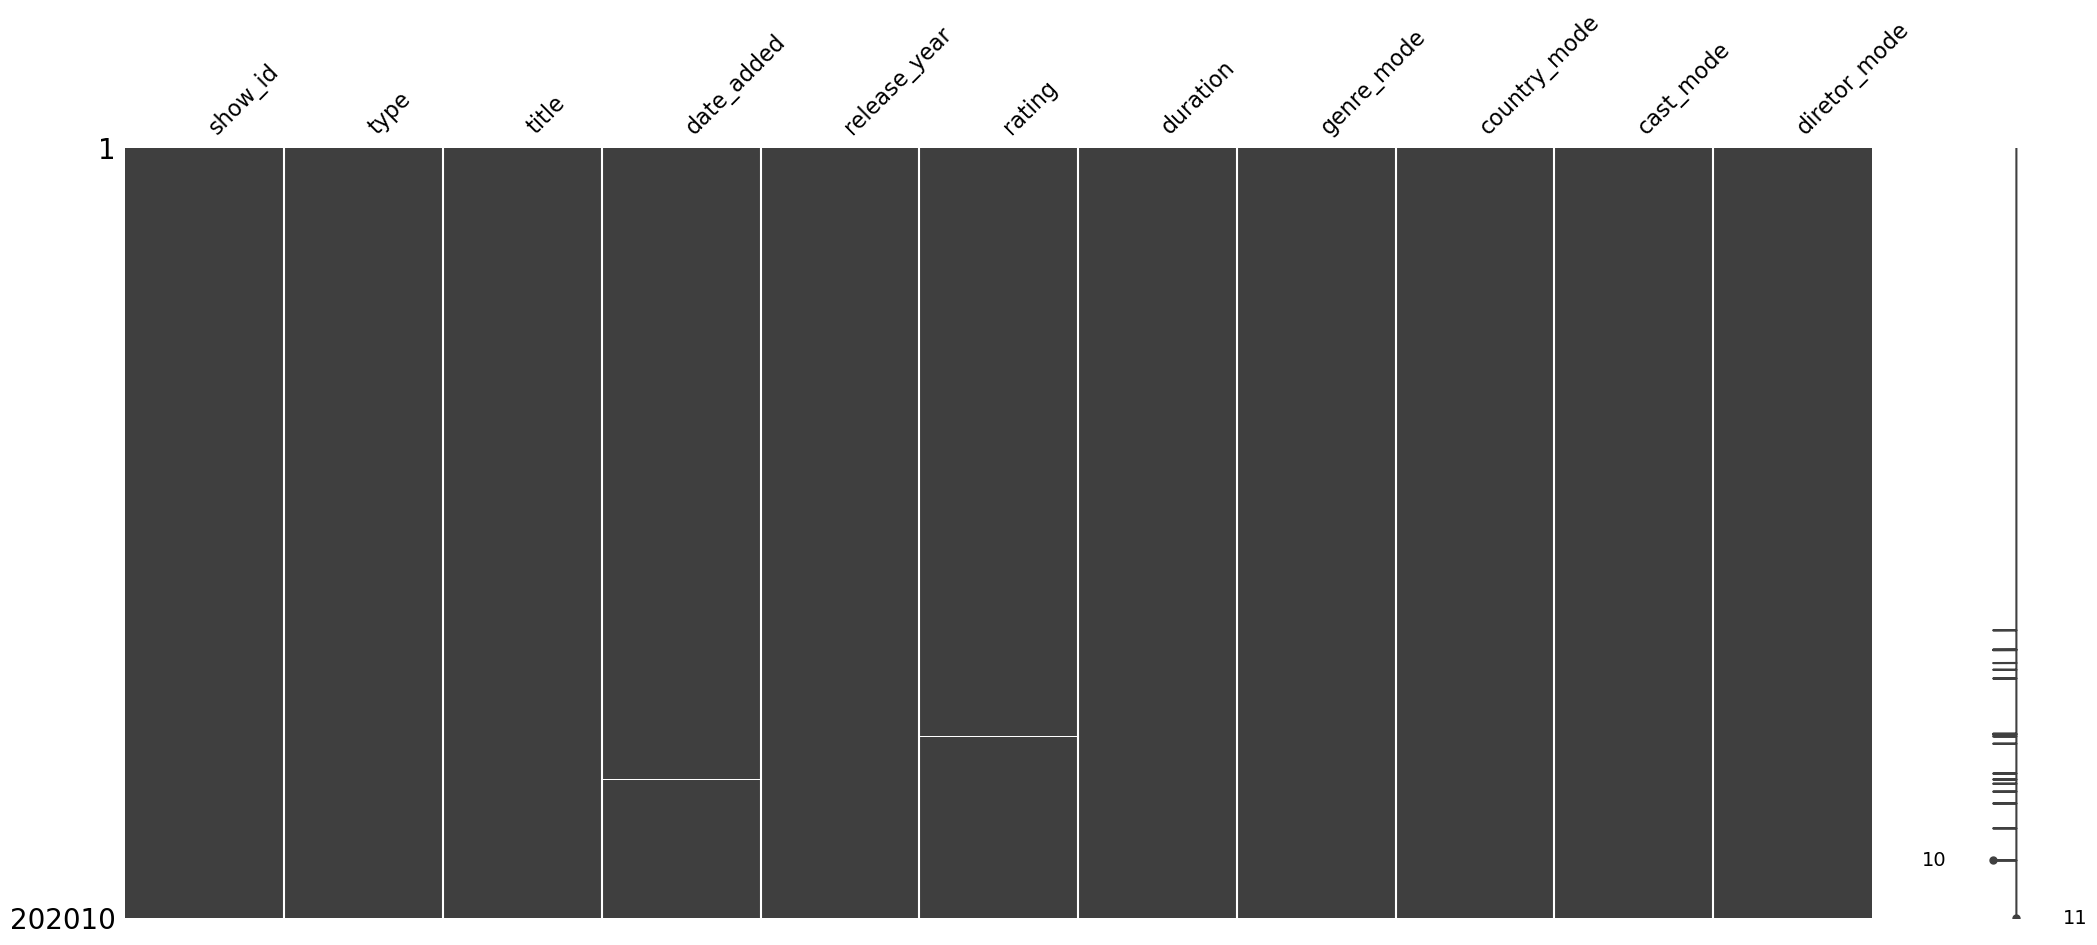

In [171]:
msno.matrix(df_new5)

In [174]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [179]:
df["type"].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

Movie      69.6%
TV Show    30.4%
Name: type, dtype: object

In [181]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [210]:
df["year"]=df["date_added"].dt.year

In [224]:
df["month"]=df["date_added"].dt.month_name()

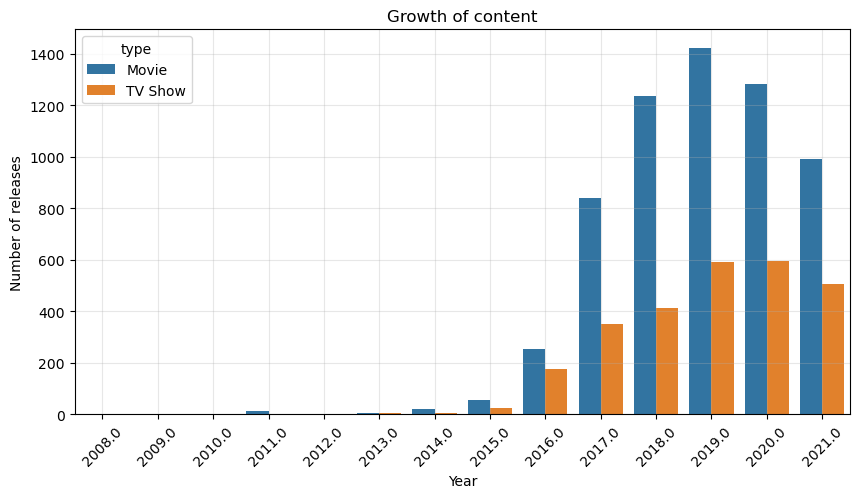

In [234]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(data=df,x="year",hue="type")
plt.title("Growth of content")
plt.xlabel("Year")
plt.ylabel("Number of releases")
plt.grid(alpha=0.3)
plt.show()

<Axes: xlabel='month', ylabel='Count'>

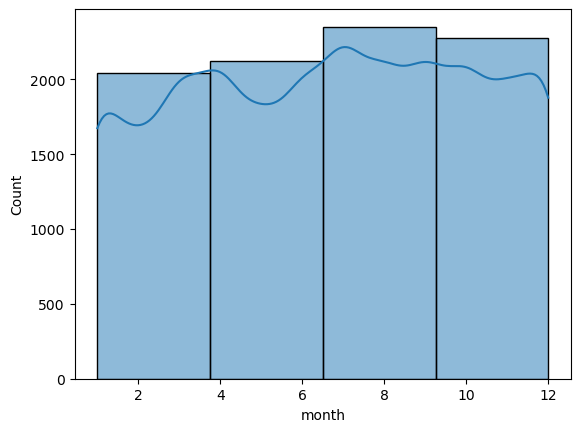

In [218]:
sns

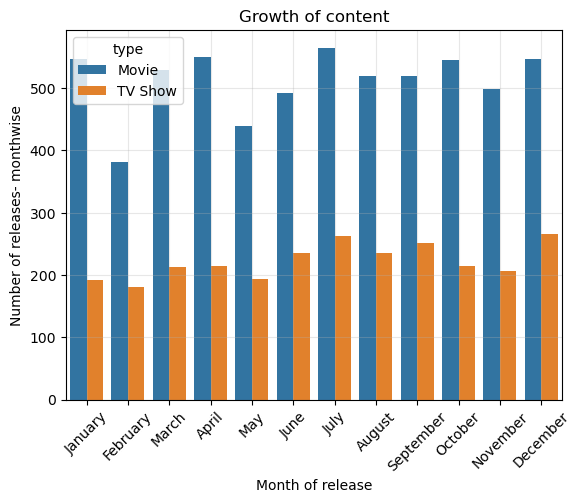

In [241]:

plt.xticks(rotation=45)
sns.countplot(data=df,x="month",order=order_n,hue="type")
plt.title("Growth of content")
plt.xlabel("Month of release")
plt.ylabel("Number of releases- monthwise")
plt.grid(alpha=0.3)
plt.show()


In [239]:
order_n=["January","February","March","April","May","June","July","August","September","October","November","December"]

In [237]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [238]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
year              14
month             12
dtype: int64

In [242]:
df.month.value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month, dtype: int64

In [249]:
df_new5.country_mode.value_counts()[:25:]

United States     59325
India             22814
United Kingdom    12965
unknown           11897
Japan              8679
France             8252
Canada             7915
Spain              5315
South Korea        5043
Germany            4383
Mexico             3941
China              3317
Turkey             2714
Australia          2616
Nigeria            2451
Hong Kong          2355
Egypt              2318
Indonesia          2126
Taiwan             2102
Belgium            2052
Thailand           1935
Philippines        1888
Brazil             1829
Argentina          1780
Italy              1667
Name: country_mode, dtype: int64

In [250]:
df_new5["year"]=df_new5["date_added"].dt.year

In [260]:
country_growth=df_new5[["show_id","country_mode","year"]]

In [261]:
country_growth.reset_index()

index show_id   country_mode    year
0            0      s1  United States  2021.0
1            8      s2   South Africa  2021.0
2           10      s2   South Africa  2021.0
3           12      s2   South Africa  2021.0
4           14      s2   South Africa  2021.0
...        ...     ...            ...     ...
202005  814890   s8807          India  2019.0
202006  814894   s8807          India  2019.0
202007  814898   s8807          India  2019.0
202008  814902   s8807          India  2019.0
202009  814906   s8807          India  2019.0

[202010 rows x 4 columns]

In [263]:
country_growth_copy = country_growth.copy(deep=True)

In [265]:
country_growth_copy.drop_duplicates(inplace=True)

In [268]:
new_group=country_growth_copy.groupby("country_mode")["year"].min()

In [277]:
new_group=new_group.reset_index()

In [278]:
new_group

country_mode    year
0                  2014.0
1     Afghanistan  2017.0
2         Albania  2018.0
3         Algeria  2020.0
4          Angola  2020.0
..            ...     ...
119     Venezuela  2017.0
120       Vietnam  2017.0
121  West Germany  2017.0
122      Zimbabwe  2016.0
123       unknown  2015.0

[124 rows x 2 columns]

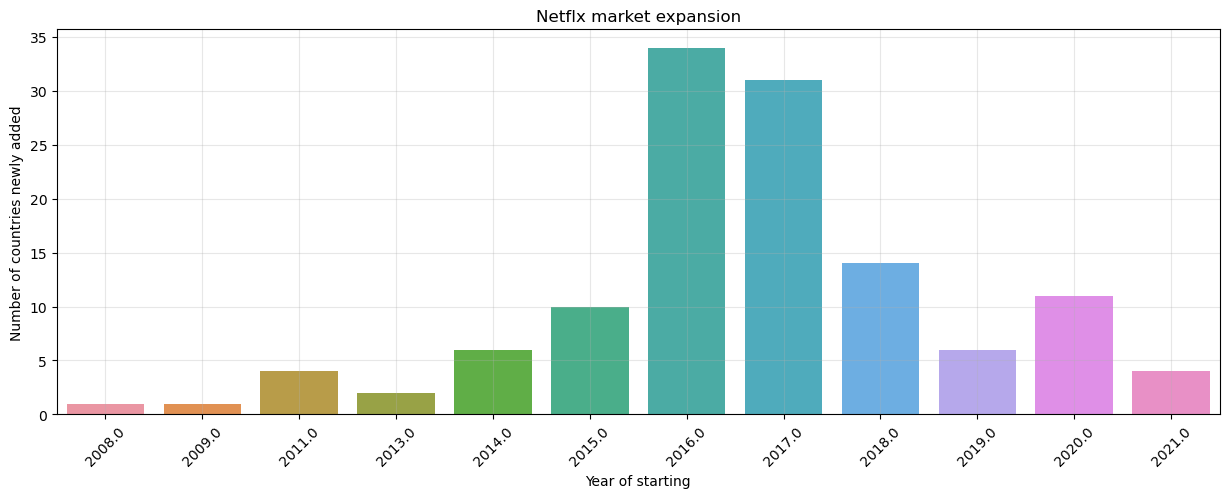

In [281]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(data=new_group,x="year")
plt.title("Netflx market expansion")
plt.xlabel("Year of starting")
plt.ylabel("Number of countries newly added")
plt.grid(alpha=0.3)
plt.show()


In [283]:
genre_year=df_new5[["show_id","type","genre_mode","year"]]

In [284]:
genre_year_copy=genre_year.copy(deep=True)

In [285]:
genre_year_copy.drop_duplicates(inplace=True)

In [286]:
genre_year_copy.nunique()

show_id       8807
type             2
genre_mode      42
year            14
dtype: int64

In [310]:
    genre_year_copy

show_id     type                genre_mode    year
0           s1    Movie             Documentaries  2021.0
8           s2  TV Show    International TV Shows  2021.0
10          s2  TV Show                 TV Dramas  2021.0
12          s2  TV Show              TV Mysteries  2021.0
128         s3  TV Show            Crime TV Shows  2021.0
...        ...      ...                       ...     ...
814694   s8806    Movie  Children & Family Movies  2020.0
814698   s8806    Movie                  Comedies  2020.0
814814   s8807    Movie                    Dramas  2019.0
814818   s8807    Movie      International Movies  2019.0
814822   s8807    Movie          Music & Musicals  2019.0

[19323 rows x 4 columns]

In [303]:
genre_copy_pivot=genre_year_copy.groupby(["show_id","genre_mode"]).agg({"year":"count"})

In [305]:
genre_copy_pivot.reset_index()

show_id              genre_mode  year
0          s1           Documentaries     1
1         s10                Comedies     1
2         s10                  Dramas     1
3        s100             TV Comedies     1
4        s100               TV Dramas     1
...       ...                     ...   ...
19318    s998        British TV Shows     1
19319    s998              Docuseries     1
19320    s998  International TV Shows     1
19321    s999           Documentaries     1
19322    s999    International Movies     1

[19323 rows x 3 columns]

In [308]:
genre_new=pd.pivot_table(genre_copy_pivot,
                  index="show_id",
                  columns="genre_mode",
                  values="year",
                  aggfunc=np.sum)

In [309]:
genre_new

genre_mode  Action & Adventure  Anime Features  Anime Series  \
show_id                                                        
s1                         NaN             NaN           NaN   
s10                        NaN             NaN           NaN   
s100                       NaN             NaN           NaN   
s1000                      NaN             NaN           NaN   
s1001                      1.0             NaN           NaN   
...                        ...             ...           ...   
s995                       NaN             NaN           NaN   
s996                       NaN             NaN           NaN   
s997                       NaN             NaN           NaN   
s998                       NaN             NaN           NaN   
s999                       NaN             NaN           NaN   

genre_mode  British TV Shows  Children & Family Movies  Classic & Cult TV  \
show_id                                                                     
s1                       NaN                       NaN                NaN   
s10                      NaN                       NaN                NaN   
s100                     NaN                       NaN                NaN   
s1000                    NaN                       NaN                NaN   
s1001                    NaN                       NaN                NaN   
...                      ...                       ...                ...   
s995                     NaN                       NaN                NaN   
s996                     NaN                       NaN                NaN   
s997                     NaN                       NaN                NaN   
s998                     1.0                       NaN                NaN   
s999                     NaN                       NaN                NaN   

genre_mode  Classic Movies  Comedies  Crime TV Shows  Cult Movies  ...  \
show_id                                                            ...   
s1                     NaN       NaN             NaN          NaN  ...   
s10                    NaN       1.0             NaN          NaN  ...   
s100                   NaN       NaN             NaN          NaN  ...   
s1000                  NaN       NaN             NaN          NaN  ...   
s1001                  NaN       NaN             NaN          NaN  ...   
...                    ...       ...             ...          ...  ...   
s995                   NaN       NaN             NaN          NaN  ...   
s996                   NaN       1.0             NaN          NaN  ...   
s997                   NaN       NaN             NaN          NaN  ...   
s998                   NaN       NaN             NaN          NaN  ...   
s999                   NaN       NaN             NaN          NaN  ...   

genre_mode  TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  \
show_id                                                                
s1                            NaN          NaN        NaN        NaN   
s10                           NaN          NaN        NaN        NaN   
s100                          NaN          1.0        1.0        NaN   
s1000                         NaN          NaN        NaN        NaN   
s1001                         NaN          NaN        NaN        NaN   
...                           ...          ...        ...        ...   
s995                          NaN          NaN        NaN        NaN   
s996                          NaN          NaN        NaN        NaN   
s997                          NaN          NaN        NaN        NaN   
s998                          NaN          NaN        NaN        NaN   
s999                          NaN          NaN        NaN        NaN   

genre_mode  TV Mysteries  TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  \
show_id                                                                 
s1                   NaN                  NaN       NaN           NaN   
s10                  NaN                  NaN 

In [313]:
genre_new1=pd.pivot_table(genre_year_copy,
                  index="year",
                  columns="genre_mode",
                  values="show_id",
                  aggfunc="count")

In [314]:
genre_new1

genre_mode  Action & Adventure  Anime Features  Anime Series  \
year                                                           
2008.0                     NaN             NaN           NaN   
2009.0                     NaN             NaN           NaN   
2010.0                     NaN             NaN           NaN   
2011.0                     NaN             NaN           NaN   
2012.0                     NaN             NaN           NaN   
2013.0                     NaN             NaN           NaN   
2014.0                     1.0             NaN           NaN   
2015.0                     2.0             NaN           NaN   
2016.0                    18.0             4.0          14.0   
2017.0                    97.0             9.0          11.0   
2018.0                   173.0             7.0          22.0   
2019.0                   202.0            14.0          42.0   
2020.0                   170.0            14.0          46.0   
2021.0                   196.0            23.0          40.0   

genre_mode  British TV Shows  Children & Family Movies  Classic & Cult TV  \
year                                                                        
2008.0                   NaN                       NaN                NaN   
2009.0                   NaN                       NaN                NaN   
2010.0                   NaN                       NaN                NaN   
2011.0                   NaN                       1.0                NaN   
2012.0                   NaN                       1.0                NaN   
2013.0                   NaN                       2.0                NaN   
2014.0                   NaN                       4.0                1.0   
2015.0                   6.0                      11.0                1.0   
2016.0                  19.0                      20.0                1.0   
2017.0                  48.0                      78.0                9.0   
2018.0                  43.0                      85.0                4.0   
2019.0                  62.0                     147.0                1.0   
2020.0                  44.0                     170.0                6.0   
2021.0                  30.0                     122.0                3.0   

genre_mode  Classic Movies  Comedies  Crime TV Shows  Cult Movies  ...  \
year                                                               ...   
2008.0                 NaN       NaN             NaN          NaN  ...   
2009.0                 NaN       NaN             NaN          NaN  ...   
2010.0                 NaN       NaN             NaN          1.0  ...   
2011.0                 NaN       NaN             NaN          NaN  ...   
2012.0                 NaN       2.0             NaN          NaN  ...   
2013.0                 NaN       1.0             2.0          NaN  ...   
2014.0                 NaN       2.0             1.0          NaN  ...   
2015.0                 NaN      12.0             1.0          NaN  ...   
2016.0                 2.0      48.0            27.0          1.0  ...   
2017.0                15.0     177.0            63.0          4.0  ...   
2018.0                 4.0     297.0            85.0         12.0  ...   
2019.0                44.0     420.0           110.0         22.0  ...   
2020.0                29.0     416.0           102.0         13.0  ...   
2021.0                22.0     299.0            78.0         18.0  ...   

genre_mode  TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  \
year                                                                   
2008.0                        NaN          NaN        NaN        NaN   
2009.0                        NaN          NaN        NaN        NaN   
2010.0                        NaN          NaN        NaN        NaN   
2011.0                        NaN          NaN        NaN        NaN   
2012.0                        NaN          NaN        NaN        NaN   
2013.0                        NaN          NaN       

Text(0.5, 1.0, 'Most loved genre in years')

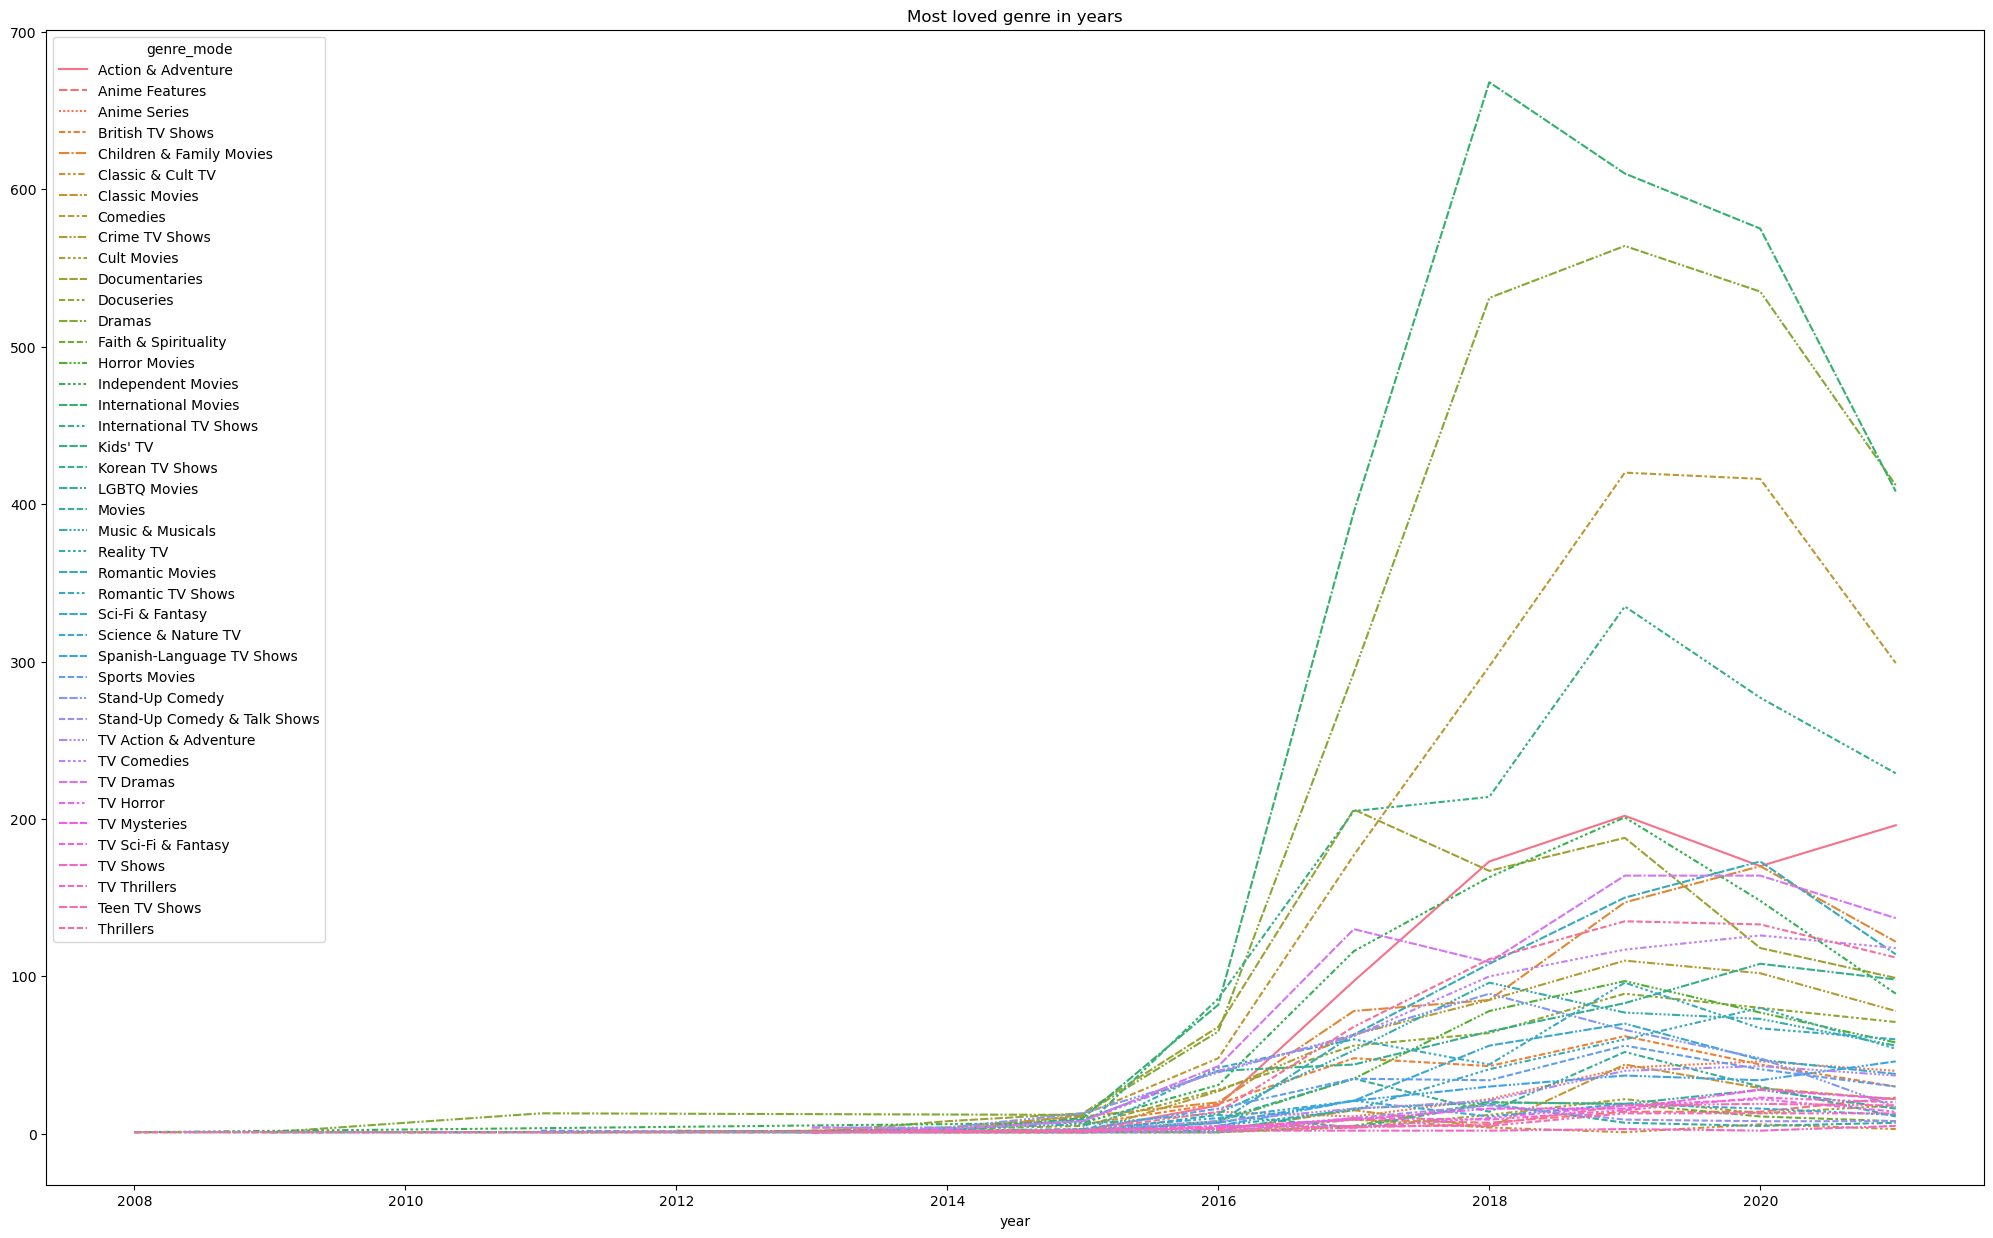

In [322]:
plt.figure(figsize=(25,15))
sns.lineplot(data=genre_new1)
plt.title("Most loved genre in years")

In [320]:
genre_new1.sum(axis=0)

genre_mode
Action & Adventure               859.0
Anime Features                    71.0
Anime Series                     175.0
British TV Shows                 252.0
Children & Family Movies         641.0
Classic & Cult TV                 26.0
Classic Movies                   116.0
Comedies                        1674.0
Crime TV Shows                   469.0
Cult Movies                       71.0
Documentaries                    869.0
Docuseries                       394.0
Dramas                          2427.0
Faith & Spirituality              65.0
Horror Movies                    357.0
Independent Movies               756.0
International Movies            2752.0
International TV Shows          1350.0
Kids' TV                         449.0
Korean TV Shows                  151.0
LGBTQ Movies                     102.0
Movies                            57.0
Music & Musicals                 375.0
Reality TV                       255.0
Romantic Movies                  616.0
Romantic TV Sh

<Axes: xlabel='year', ylabel='genre_mode'>

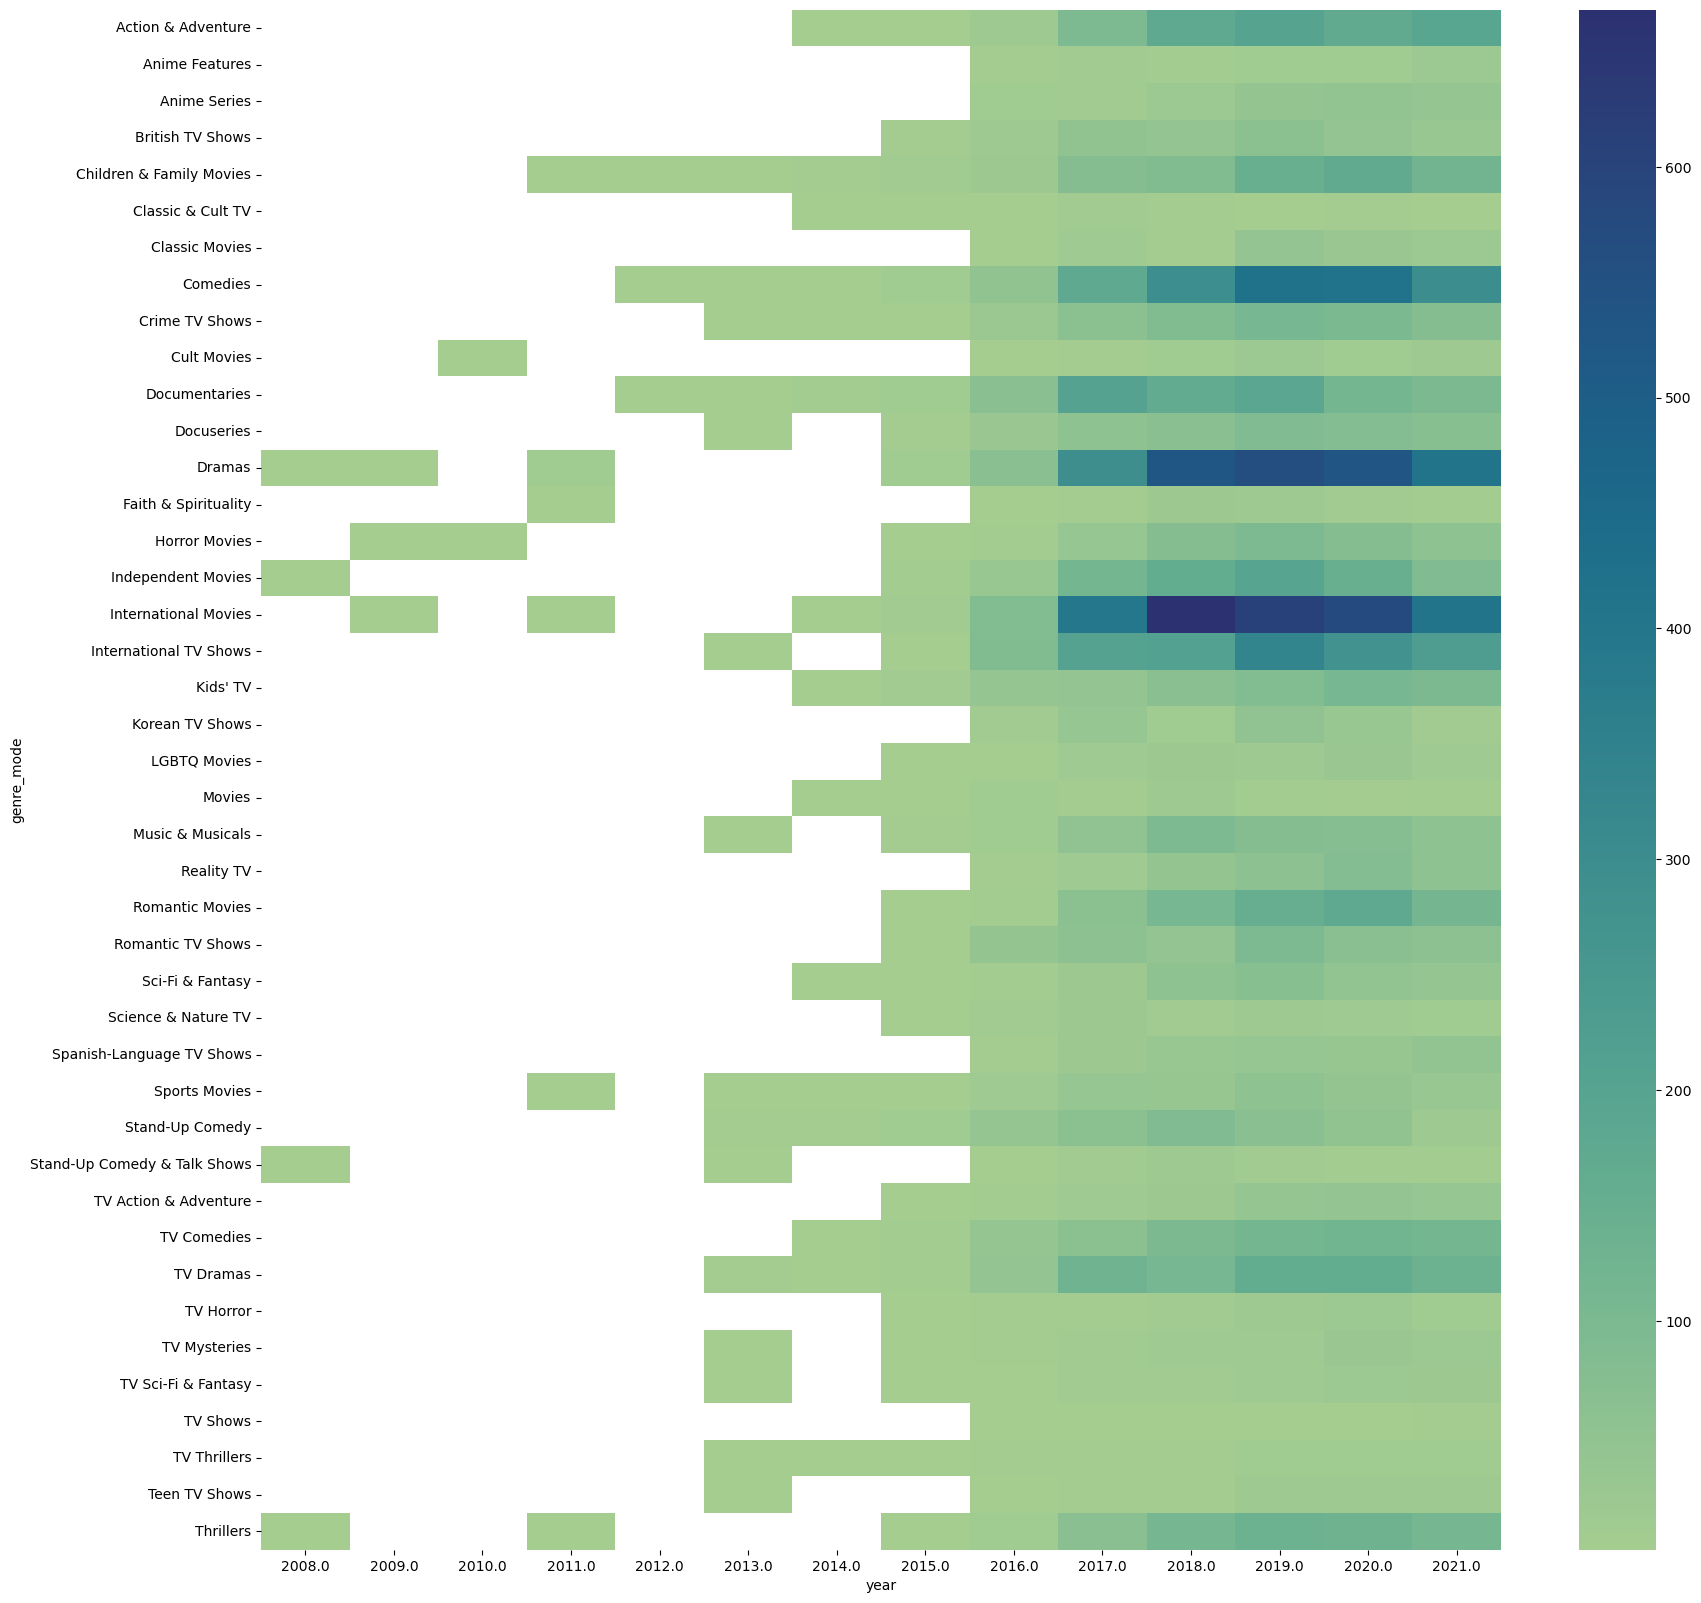

In [329]:
plt.figure(figsize=(20,20))
sns.heatmap(genre_new1.T,cmap='crest')

In [330]:
country_genre=df_new5[["show_id","country_mode","genre_mode"]]

In [331]:
country_genre_copy=country_genre.copy(deep=True)

In [333]:
country_genre_copy.drop_duplicates(inplace=True)

In [335]:
country_genre_pivot=pd.pivot_table(country_genre_copy,
                                  index="country_mode",
                                  columns="genre_mode",
                                  values="show_id",
                                  aggfunc="count")

In [350]:
plt.figure(figsize=(150,150))
plt.xticks(fontsize=60,rotation=45)
plt.yticks(fontsize=60)
sns.heatmap(country_genre_pivot,cmap='crest')

<Axes: xlabel='genre_mode', ylabel='country_mode'>

In [352]:
duration=df_new5[["show_id","type","duration"]]

In [353]:
duration_copy=duration.copy(deep=True)

In [354]:
duration_copy.drop_duplicates(inplace=True)

In [357]:
duration_copy_group=duration_copy.groupby(["type","duration"]).agg({"show_id":"count"})

In [366]:
duration_copy_group.reset_index(inplace=True)

In [367]:
duration_copy_group

type   duration  show_id
0      Movie     10 min        1
1      Movie    100 min      108
2      Movie    101 min      116
3      Movie    102 min      122
4      Movie    103 min      114
..       ...        ...      ...
215  TV Show  5 Seasons       65
216  TV Show  6 Seasons       33
217  TV Show  7 Seasons       23
218  TV Show  8 Seasons       17
219  TV Show  9 Seasons        9

[220 rows x 3 columns]

In [374]:
duration_copy_group["duration"].value_counts()

10 min       1
49 min       1
38 min       1
39 min       1
40 min       1
            ..
169 min      1
17 min       1
170 min      1
171 min      1
9 Seasons    1
Name: duration, Length: 220, dtype: int64

In [411]:
duration_split=duration_copy_group["duration"].str.split(' ',expand=True)

In [406]:
duration_copy_group_merge=duration_copy_group.merge(duration_split,left_index=True,right_index=True)

TypeError: 'DataFrame' object is not callable

In [391]:
duration_copy_group.merge.rename({0:"duration_value"},axis=1,inplace=True)

In [392]:
duration_copy_group.merge

type   duration  show_id duration_actula duration_value        1
0      Movie     10 min        1       [10, min]             10      min
1      Movie    100 min      108      [100, min]            100      min
2      Movie    101 min      116      [101, min]            101      min
3      Movie    102 min      122      [102, min]            102      min
4      Movie    103 min      114      [103, min]            103      min
..       ...        ...      ...             ...            ...      ...
215  TV Show  5 Seasons       65    [5, Seasons]              5  Seasons
216  TV Show  6 Seasons       33    [6, Seasons]              6  Seasons
217  TV Show  7 Seasons       23    [7, Seasons]              7  Seasons
218  TV Show  8 Seasons       17    [8, Seasons]              8  Seasons
219  TV Show  9 Seasons        9    [9, Seasons]              9  Seasons

[220 rows x 6 columns]

<Axes: xlabel='duration_value', ylabel='show_id'>

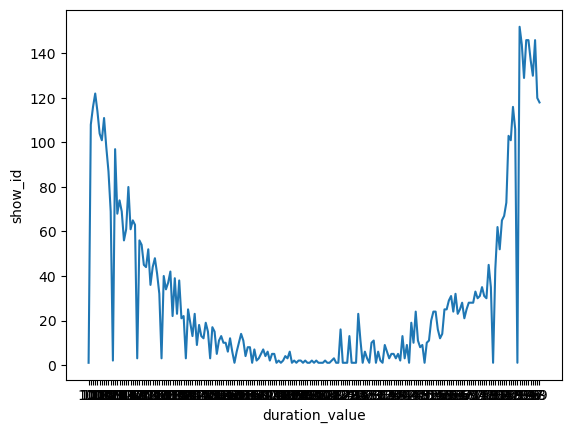

In [395]:
sns.lineplot(data=(duration_copy_group.merge[duration_copy_group.merge["type"]=="Movie"]),x="duration_value",y="show_id")

<Axes: xlabel='duration_value', ylabel='Count'>

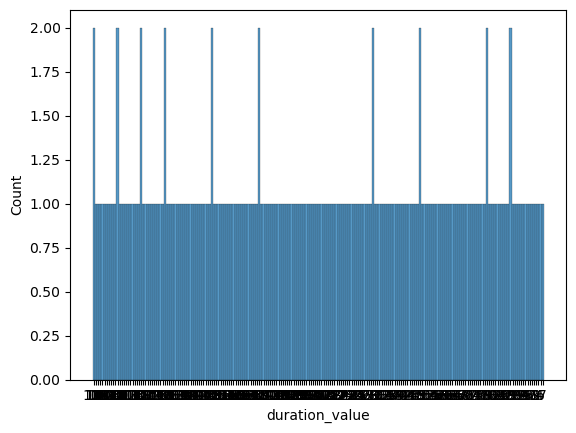

In [457]:
sns.histplot(duration_copy_group_merge["duration_value"],bins=2)

In [400]:
duration_movie=duration_copy_group.merge[duration_copy_group.merge["type"]=="Movie"]
duration_TV=duration_copy_group.merge[duration_copy_group.merge["type"]=="TV Show"]

<Axes: xlabel='duration_value', ylabel='Count'>

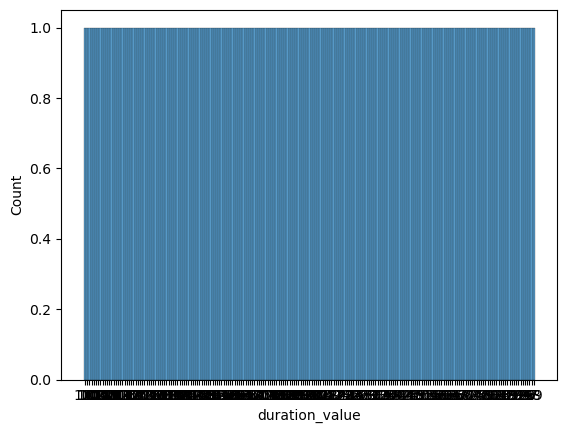

In [404]:
sns.lineplot(duration_movie)

In [438]:
new_merge=pd.merge(duration_copy_group,duration_split,left_index=True,right_index=True,how="left")

In [440]:
new_merge.rename({0:"duration_actual_new"},axis=1,inplace=True)

In [439]:
new_merge

type   duration  show_id duration_actula    0        1
0      Movie     10 min        1       [10, min]   10      min
1      Movie    100 min      108      [100, min]  100      min
2      Movie    101 min      116      [101, min]  101      min
3      Movie    102 min      122      [102, min]  102      min
4      Movie    103 min      114      [103, min]  103      min
..       ...        ...      ...             ...  ...      ...
215  TV Show  5 Seasons       65    [5, Seasons]    5  Seasons
216  TV Show  6 Seasons       33    [6, Seasons]    6  Seasons
217  TV Show  7 Seasons       23    [7, Seasons]    7  Seasons
218  TV Show  8 Seasons       17    [8, Seasons]    8  Seasons
219  TV Show  9 Seasons        9    [9, Seasons]    9  Seasons

[220 rows x 6 columns]

In [448]:
new_merge_tv=new_merge[new_merge["type"]=="TV Show"]
new_merge_movie=new_merge[new_merge["type"]=="Movie"]

In [444]:
new_merge_tv

type    duration  show_id duration_actula duration_actual_new        1
205  TV Show    1 Season     1793     [1, Season]                   1   Season
206  TV Show  10 Seasons        7   [10, Seasons]                  10  Seasons
207  TV Show  11 Seasons        2   [11, Seasons]                  11  Seasons
208  TV Show  12 Seasons        2   [12, Seasons]                  12  Seasons
209  TV Show  13 Seasons        3   [13, Seasons]                  13  Seasons
210  TV Show  15 Seasons        2   [15, Seasons]                  15  Seasons
211  TV Show  17 Seasons        1   [17, Seasons]                  17  Seasons
212  TV Show   2 Seasons      425    [2, Seasons]                   2  Seasons
213  TV Show   3 Seasons      199    [3, Seasons]                   3  Seasons
214  TV Show   4 Seasons       95    [4, Seasons]                   4  Seasons
215  TV Show   5 Seasons       65    [5, Seasons]                   5  Seasons
216  TV Show   6 Seasons       33    [6, Seasons]                   6  Seasons
217  TV Show   7 Seasons       23    [7, Seasons]                   7  Seasons
218  TV Show   8 Seasons       17    [8, Seasons]                   8  Seasons
219  TV Show   9 Seasons        9    [9, Seasons]                   9  Seasons

new_merge_tv

<Axes: xlabel='show_id', ylabel='duration_actual_new'>

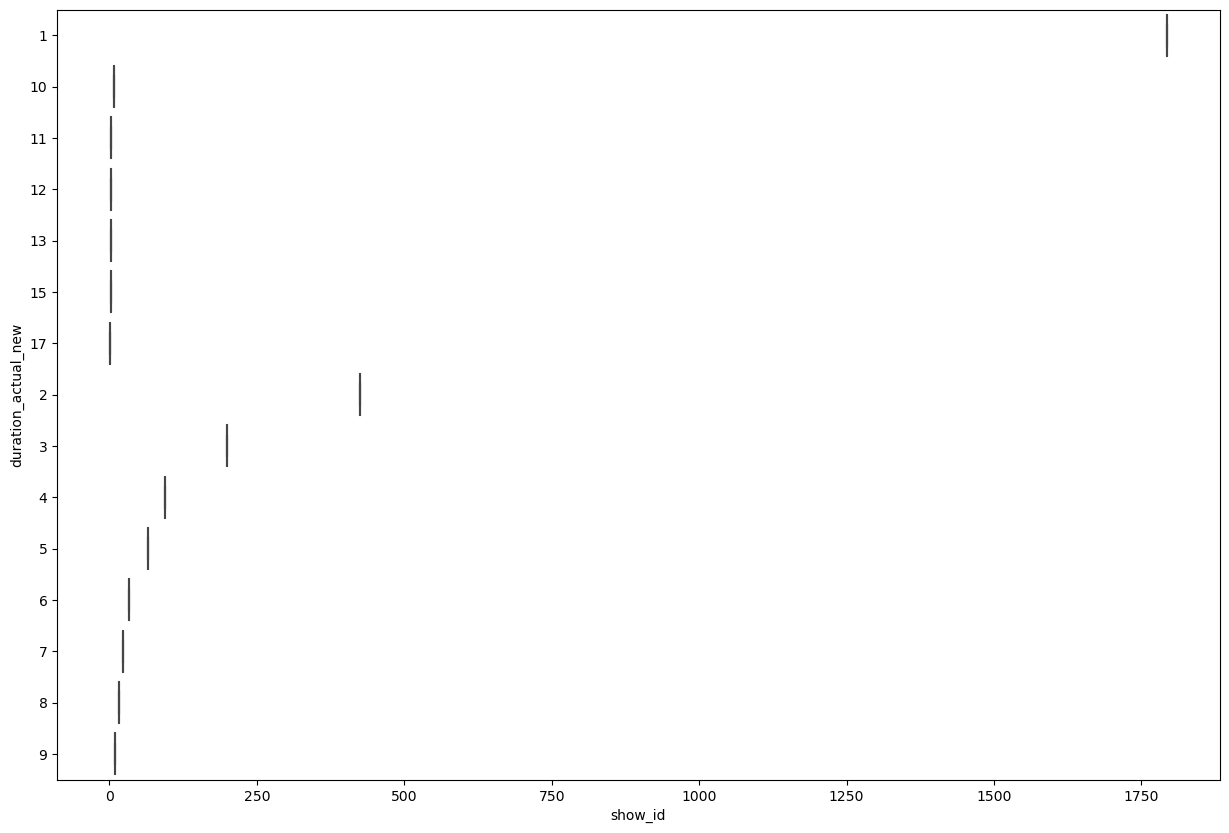

In [446]:
plt.figure(figsize=(15,10))
sns.boxplot(data=new_merge_tv,x="show_id",y="duration_actual_new")

In [436]:
new_merge_tv.drop(new_merge_tv.columns[1],axis=1,inplace=True)

C:\Users\D E L L\AppData\Local\Temp\ipykernel_3668\2652085950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merge_tv.drop(new_merge_tv.columns[1],axis=1,inplace=True)


In [437]:
new_merge_tv

type  show_id duration_actula        1
205  TV Show     1793     [1, Season]   Season
206  TV Show        7   [10, Seasons]  Seasons
207  TV Show        2   [11, Seasons]  Seasons
208  TV Show        2   [12, Seasons]  Seasons
209  TV Show        3   [13, Seasons]  Seasons
210  TV Show        2   [15, Seasons]  Seasons
211  TV Show        1   [17, Seasons]  Seasons
212  TV Show      425    [2, Seasons]  Seasons
213  TV Show      199    [3, Seasons]  Seasons
214  TV Show       95    [4, Seasons]  Seasons
215  TV Show       65    [5, Seasons]  Seasons
216  TV Show       33    [6, Seasons]  Seasons
217  TV Show       23    [7, Seasons]  Seasons
218  TV Show       17    [8, Seasons]  Seasons
219  TV Show        9    [9, Seasons]  Seasons

In [454]:
new_merge_movie.duration_actual_new.value_counts()

10     1
39     1
30     1
31     1
312    1
      ..
164    1
165    1
166    1
167    1
99     1
Name: duration_actual_new, Length: 205, dtype: int64

<Axes: xlabel='duration_actual_new', ylabel='Count'>

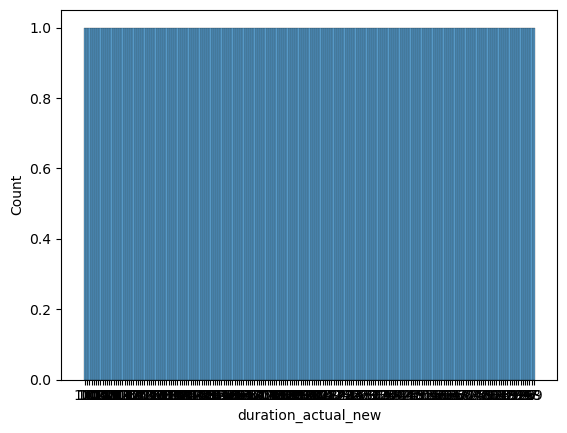

In [455]:
sns.histplot(new_merge_movie.duration_actual_new,bins=10)

<Axes: >

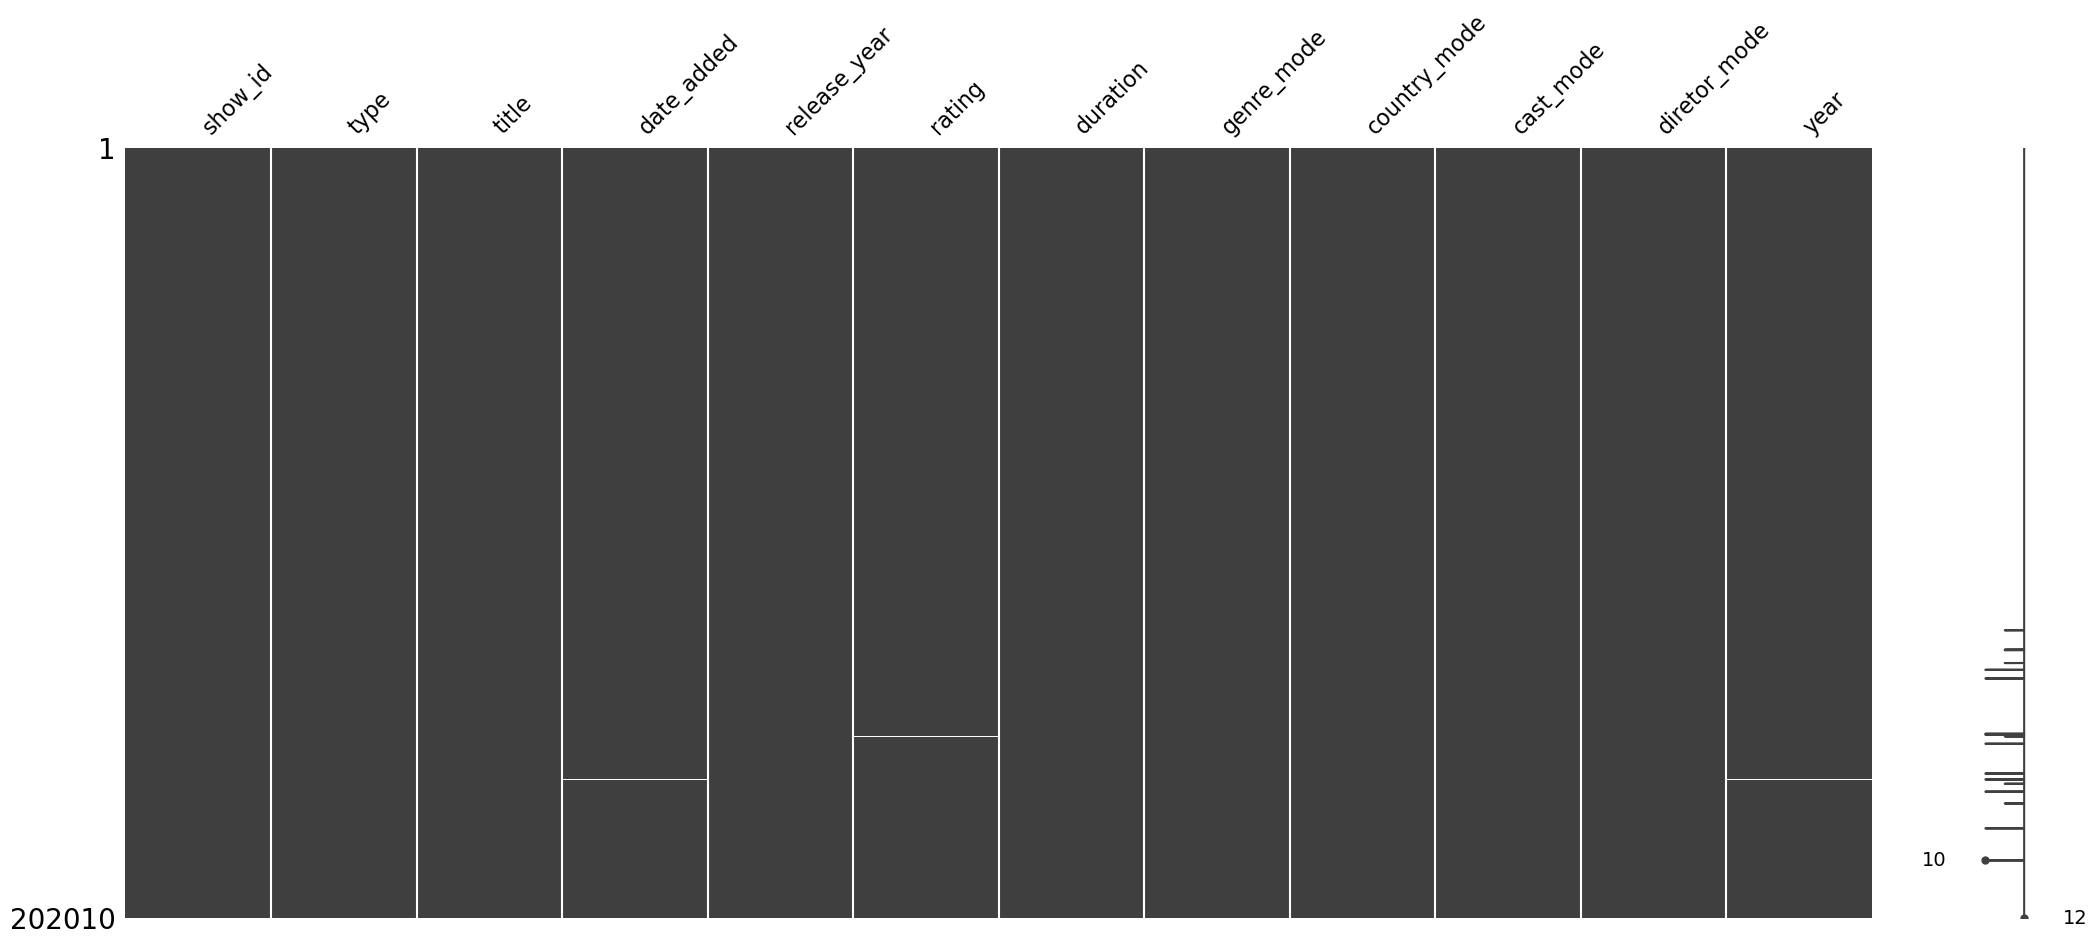

In [456]:
msno.matrix(df_new5)

<Axes: xlabel='rating', ylabel='count'>

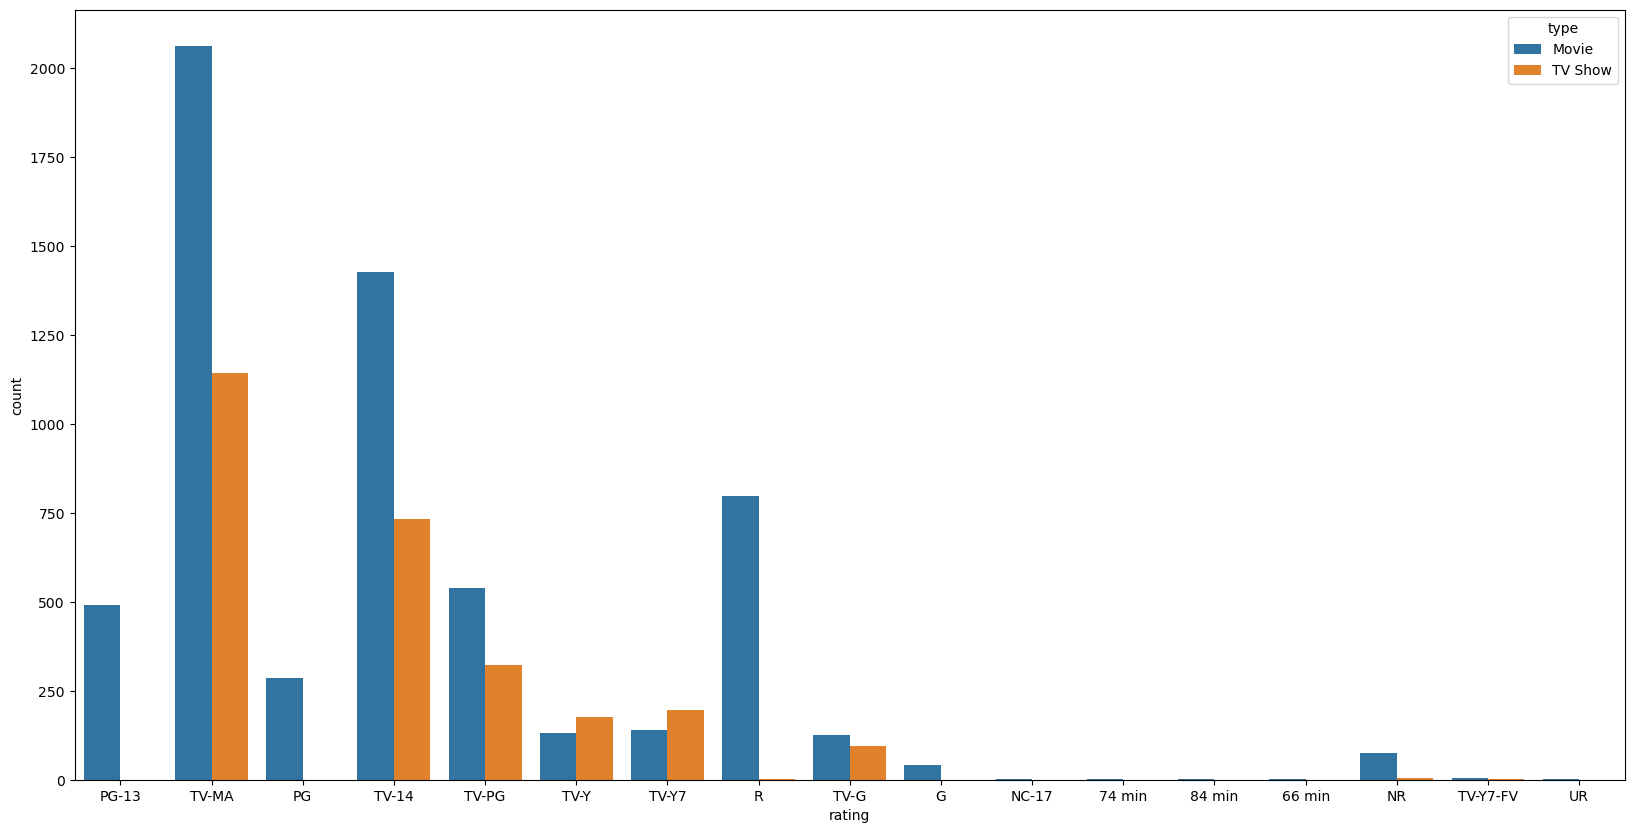

In [463]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="rating",hue="type")

In [462]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

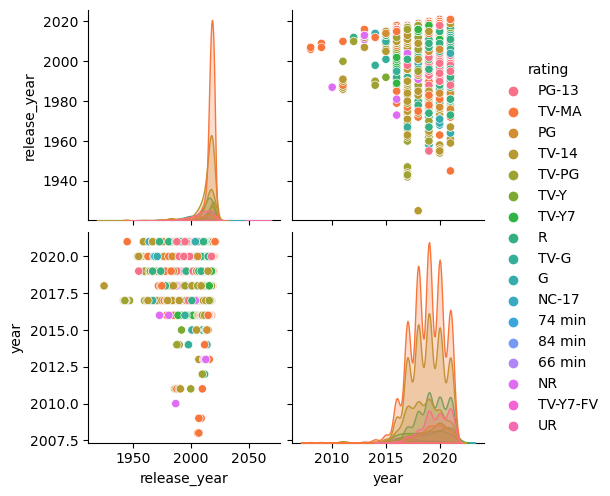

In [466]:
sns.pairplot(df,hue="rating")

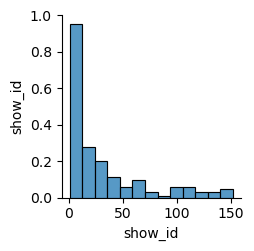

In [468]:
sns.pairplot(new_merge_movie)

In [470]:
df.duration.value_counts()[:5]

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
Name: duration, dtype: int64

In [475]:
df_new5.cast_mode.value_counts()[1:11]

Liam Neeson         161
Alfred Molina       160
John Krasinski      139
Salma Hayek         130
Frank Langella      128
Anupam Kher         127
John Rhys-Davies    125
Shah Rukh Khan      108
Naseeruddin Shah    106
Radhika Apte        104
Name: cast_mode, dtype: int64

In [476]:
df_new5.diretor_mode.value_counts()[1:11]

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: diretor_mode, dtype: int64